***
## FIT5196 Assessment 2: Dirty Data
<b>
Student Name: Devaneek sharma <br>
Student ID: 29781965 <br>
Date: 04/05/2020 </b>

Environment: Python 3.6.5 and Jupyter notebook Libraries used:
             1. pandas (for dataframe, included in Anaconda Python 3)
             2. re (for regular expression, included in Anaconda Python 3)
             3. dateutil(for parsing the date)
***

***
## Importing Libraries used in the module.
- Importing the Pandas as pd
- Importing the re (regex) library.
- Importing the parser from dateutil package
***

In [1]:
import pandas as pd
import re
from dateutil import parser
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
#!pip install python-dateutil

In [2]:
#reading the dirty data csv file
df = pd.read_csv("29781965_dirty_data.csv")
df.columns=['Id','Uber Type','Origin Region','Destination Region','Origin Latitude','Origin Longitude','Destination Latitude',
                  'Destination Longitude','Journey Distance(m)','Departure Date','Departure Time','Travel Time(s)','Arrival Time','Fare$']
#decribe function return the summary of the data frame.
df.describe()

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,0.697068,5.149837,4.970684,-36.624157,144.923812,-36.603864,144.945520,15755.954397,4111.049055,62.220912
std,0.755865,2.627847,2.440626,9.593480,0.115160,9.597886,0.092184,16707.832871,4032.432705,148.713433
min,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,465.000000,106.140000,3.500000
25%,0.000000,3.000000,3.000000,-37.861835,144.905716,-37.821393,144.927948,5186.000000,1353.990000,13.335000
50%,1.000000,5.000000,5.000000,-37.815190,144.957198,-37.814048,144.966804,8606.000000,2417.880000,19.840000
75%,1.000000,7.000000,7.000000,-37.804377,144.985865,-37.804790,144.997412,13200.500000,4047.000000,29.395000
max,3.000000,9.000000,9.000000,37.820747,145.046450,38.110916,145.046450,51061.000000,13204.980000,1102.440000


***
## Syntactic error in origin latitude and destination latitude columns:
- Describe function used above gives the summary of the data set, which shows orginlatitude max value could be 37.820747 which is not true and missing the minus sign.
- Destination shows the max value as the 38.110916, which can be possible if these value are plotted on the map it will be shown outside of the australia.
- All the origin or destination latitute have the postive latitute is to be replaced with the negative latitute.
- Below are the number of pistive origin latitute and destination latitute rows.
***

In [3]:
# cheking the origin latitute value greater than 0. 
orginLatitute = df[df['Origin Latitude'] > 0]
# values will be shown in the output
orginLatitute

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
37,ID1436294383,0,5,9,37.800945,144.918856,-38.110916,144.654173,44982.0,2018-01-09,05:56:16,10876.32,8:57:32,26.15
40,ID3134944799,1,8,4,37.815834,145.046450,-37.812669,145.000282,4278.0,2018-05-25,21:36:59,1382.04,22:00:01,20.76
42,ID5496787062,2,6,4,37.787433,144.980377,-37.804821,144.993781,3244.0,2018-06-25,22:41:47,822.30,22:55:29,106.60
44,ID1348277129,0,2,7,37.814626,144.938254,-37.861835,144.905716,10300.0,2018-04-11,01:14:31,3374.58,2:10:45,15.10
45,ID1126213384,0,3,5,37.820747,144.982190,-37.803422,144.938603,5110.0,2018-03-22,10:05:49,1286.34,10:27:15,5.80


In [4]:
# cheking the origin latitute value greater than 0.
destLatitute = df[df['Destination Latitude'] > 0]
# values will be shown in the output
destLatitute

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
49,ID5962044333,2,2,8,-37.816732,144.927453,37.807202,145.026637,10205.0,2018-03-24,19:40:59,2614.02,20:24:33,274.28
52,ID1962070344,0,1,9,-37.808648,144.952979,38.110916,144.654173,43126.0,2018-06-22,11:18:12,10342.74,14:10:34,18.15
53,ID1978019326,0,5,2,-37.815048,144.927595,37.811434,144.927106,3196.0,2018-02-26,18:05:58,805.26,18:19:23,9.34
57,ID1342233972,0,7,6,-37.861835,144.905716,37.787442,144.980409,11630.0,2018-04-24,11:42:42,3678.54,12:44:00,9.19
58,ID5875215055,2,8,4,-37.815834,145.046450,37.804147,145.007825,5328.0,2018-05-17,01:48:46,1667.64,2:16:33,188.29


***
## Fixing the orgin latitute and destination latitute in the dataframe.
- First the absolute value of the 'orgin latitute' and 'destination latitute' columns is taken.
- Now, that we all the positive value in the orgin latitute and destination latitute columns we could add negative sings to every value in these columns.
***

In [5]:
# absolute value of the orgin latitute is been calculated.
df['Origin Latitude'] = df['Origin Latitude'].abs()
# adding negative sign to the cloumn
df['Origin Latitude'] = -df['Origin Latitude']
# absolute value of the destination latitute is been calculated.
df['Destination Latitude'] = df['Destination Latitude'].abs()
# adding negative sign to the cloumn
df['Destination Latitude'] = -df['Destination Latitude']
df

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID1961774062,0,8,6,-37.815834,145.046450,-37.787433,144.980377,8369.6,2018-02-14,01:16:40,2438.22,1:57:18,13.30
1,ID1370309917,0,3,7,-37.823107,145.000806,-37.861835,144.905716,10494.0,2018-02-22,21:19:07,3330.96,22:14:37,16.49
2,ID5456796231,2,7,4,-37.861835,144.905716,-37.800103,145.005038,12423.0,2018-01-02,07:24:40,3934.38,8:30:14,381.73
3,ID3330393725,1,4,7,-37.816631,145.007369,-37.861835,144.905716,11451.0,2018-05-12,22:35:44,3595.32,23:35:39,33.76
4,ID1861780681,0,5,1,-37.800062,144.935244,-37.812151,144.973892,6257.0,2018-02-02,23:26:13,1581.12,23:52:34,12.39
5,ID3706740037,1,2,1,-37.820953,144.948091,-37.812093,144.951315,1842.0,2018-01-16,18:03:47,474.54,18:11:41,12.12
6,ID3552162707,1,6,8,-37.773845,144.983689,-37.807202,145.026637,8606.0,2018-02-27,04:32:04,1995.72,5:05:19,21.49
7,ID5153417697,2,5,2,-37.807119,144.930904,-37.816598,144.937493,1583.0,2018-03-01,21:44:28,430.08,21:51:38,70.14
8,ID1994768242,0,5,4,-37.811601,144.927428,-37.812041,145.014663,8210.0,2018-06-01,12:29:02,2073.00,13:03:35,8.72
9,ID1991889485,0,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,2018-02-09,02:16:41,4292.40,3:28:13,18.21


***
## Error In Departure Date.
- Using the datautil package and parse function is used to parse departure date string to datetime.
- Departure dates are in the format "YYYY-mm-dd", here the dates which are in wrong format like "YYYY-dd-mm" is been found and corrected.
- Also, some of the month have the day value which is more than the number of days in the month(I.e day are out of range of the month) like for february- "2018-02-30" and for April like "2018-04-31" &  for June "2018-06-31" has been observed and thus corrected.

***

In [6]:
#iterating through the df rows
for index, row in df.iterrows():
    # try condition
    try:
        # parsing the Departure Date using the datautil parser in 'yyyy-mm-dd' format
        df.loc[index,'Departure Date']= parser.parse(row['Departure Date']).date()
        print(df.loc[index,'Departure Date'])
    #catch condition
    except:
        print("Date format before fixing error:",row['Departure Date'])
        try:
            # parsing the Departure Date from "%Y-%d-%m" to '%Y-%m-%d' format
            dateNew= datetime.strptime(row['Departure Date'], "%Y-%d-%m").strftime('%Y-%m-%d')
            df.loc[index,'Departure Date']= parser.parse(dateNew).date()
            print("Date format after fixing error:",df.loc[index,'Departure Date'])
        #catch condition for checking month having the day value more than the number of days in the month
        except:
            # Initialising the day and month variable
            day=0
            month=0
            # spliting the string departure date by '-'
            yearMonthDay= row['Departure Date'].split('-')
            # getting the year from the string
            year=yearMonthDay[0]
            #getting the month from the string
            month = yearMonthDay[1]
            # getting the day from the string
            day=yearMonthDay[2]
            # checking for day 31 and 30 for the months
            if day=='31' or day=='30':
                # increment the month and day by '1'
                month=int(month)+1
                day= 1
                # format the date string
                formatDate=year+'-'+str(month)+'-'+str(day)
                # changing the datetime string to date and time and get date
                df.loc[index,'Departure Date'] =  datetime.strptime(formatDate,'%Y-%m-%d').date()
                print("Date format afer fixing error:",df.loc[index,'Departure Date'])
            
   
        

2018-02-14
2018-02-22
2018-01-02
2018-05-12
2018-02-02
2018-01-16
2018-02-27
2018-03-01
2018-06-01
2018-02-09
2018-02-20
2018-02-01
2018-07-21
2018-02-19
2018-03-07
2018-03-01
2018-03-23
2018-04-11
2018-06-15
2018-02-23
2018-02-25
2018-06-23
2018-05-03
2018-03-07
2018-07-21
2018-02-04
2018-02-04
2018-03-24
2018-04-23
2018-04-16
2018-03-16
2018-07-16
2018-01-08
2018-05-01
2018-01-20
2018-07-08
2018-07-11
2018-01-09
2018-02-02
2018-03-06
2018-05-25
2018-01-12
2018-06-25
2018-05-12
2018-04-11
2018-03-22
2018-07-19
2018-01-16
2018-01-04
2018-03-24
2018-03-03
2018-01-25
2018-06-22
2018-02-26
2018-05-18
2018-07-16
2018-03-23
2018-04-24
2018-05-17
2018-01-26
2018-05-09
2018-01-15
2018-06-25
2018-01-12
2018-03-17
2018-03-12
2018-04-19
2018-07-03
2018-02-09
2018-03-27
2018-06-07
2018-03-02
2018-07-04
2018-03-15
2018-01-12
2018-02-06
2018-05-08
2018-05-28
2018-07-15
2018-01-27
2018-04-18
2018-03-13
2018-07-26
2018-01-01
2018-01-11
2018-04-10
2018-05-23
2018-01-16
2018-06-21
2018-02-15
2018-07-20

***
## Error in Uber Type.  
-  Uber has just 3  type of the journey namely Uber pool, Uberx, Uber black. which is been represented as uber type 0,1,2.
-  It has been observed that the some of the rows has the uber type as value '3', the Id having the uber type value 3 is been extracted.
- Id is having the unique pattern like for the Id start with numneric '1' after the character belong to uber type 0, Id start with numeric '3' after character 'ID' belng to uber type 1, Id start with numeric '5' after character 'ID' belng to uber type 2.
- Thus extracting the uber type '3' rows and corect them on the basis of the ID.
- Total there are 3 rows with the uber type as 3.
***

In [7]:
#Uber Type one have one Id that start from 1 and 1 from 5
# uber type 2 has ID3512742595
#ID3886656023
#ID1968681204 has Id starting with 


# getting the rows where the ubertype is greater than 2
#rowUberType3=df[df["Uber Type"]>2]
#iterating through the rows
for index,row in df.iterrows():
    #getting the id of the rows
    Id=row['Id']
    # regex to get the first digit after the character 'ID'
    regexStr= r'[0-9]'
    uberId = re.search(regexStr,Id)
    #checking if the Id starts with 3
    if uberId[0]=='3':
        #changing the uber type to 1
        df.loc[index,'Uber Type']=1
    # checking if the Id starts with 5
    elif uberId[0]=='5':
        #changing the uber type to 2
        df.loc[index,'Uber Type']=2
    else:
        #changing the uber type to 1
        df.loc[index,'Uber Type']=0
        #print(row['Id'],row['Uber Type'],df.loc[index,'Uber Type'])

## Arrival and Departure Time Error.
- It has been observed that for some of the records departure time is less than the arrival time, like the departure time is '13:26:29' and Arrival time is '13:16:59' which can't be possible.

In [8]:
#ID1166108298
df['Calculated Travel Time(s)']=0
# iterating over the data frame
for index,row in df.iterrows():
    # Intialising the variable
    deptTimeSecs=0
    arriTimeSecs=0
    # parsing the date in H:M:S format
    pt =datetime.strptime(row['Departure Time'],'%H:%M:%S')
    # calculating the deperature time in seconds
    deptTimeSecs = pt.second+pt.minute*60+pt.hour*3600
    # parsing the date in H:M:S format
    ptime =datetime.strptime(row['Arrival Time'],'%H:%M:%S')
    # calculating the arrival time in seconds
    arriTimeSecs = ptime.second+ptime.minute*60+ptime.hour*3600
    # calculating the actual travel time in seconds
    actTravelTime = arriTimeSecs-deptTimeSecs
    # assigning the actual travel time to Calculated Travel Time(s) in the data frame.
    df.loc[index,'Calculated Travel Time(s)']=actTravelTime

# checking for arrival time less than departure time 
rows=df[df['Calculated Travel Time(s)']<0]
# iterating over the data frame
for index,row in rows.iterrows():
    # checkinh if calculated travel time is less than 0
    if row['Calculated Travel Time(s)']<0:
        #getting the negative value of the Calculated Travel Time(s)
        negVal=-int(row['Calculated Travel Time(s)'])
        # checking if the calculated travel time(s) is equal to travel time(s)
        if negVal==int(row['Travel Time(s)']):
            # swaping the departure time with the arrival time in the data frame
            depDate=row['Departure Time']
            df.loc[index,'Departure Time']=row['Arrival Time']
            df.loc[index,'Arrival Time']=depDate
            print(df.loc[[index]])
        
for index,row in df[['Departure Time','Arrival Time']].iterrows():
    print(row['Departure Time'],row['Arrival Time'])

               Id  Uber Type  Origin Region  Destination Region  \
161  ID3288774754          1              6                   1   

     Origin Latitude  Origin Longitude  Destination Latitude  \
161       -37.790797        144.985865             -37.80943   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
161             144.963738               3548.0     2018-02-22       08:09:29   

     Travel Time(s) Arrival Time  Fare$  Calculated Travel Time(s)  
161         1005.42      8:26:14   6.63                      -1005  
               Id  Uber Type  Origin Region  Destination Region  \
162  ID1912067910          0              8                   9   

     Origin Latitude  Origin Longitude  Destination Latitude  \
162       -37.807202        145.026637            -38.110916   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
162             144.654173              49777.0     2018-01-15       07:48:50   

     Tra

In [9]:
df[df['Arrival Time']<df['Departure Time']]


,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Calculated Travel Time(s)
23,ID1128040792,0,9,7,-38.110916,144.654173,-37.861835,144.905716,50797.0,2018-03-07,20:46:04,13204.98,0:26:08,26.49,-73196
54,ID5115359963,2,4,8,-37.807725,144.993717,-37.815834,145.046450,4954.0,2018-05-18,23:58:27,1512.30,0:23:39,170.62,-84888
115,ID1522240721,0,8,9,-37.815834,145.046450,-38.110916,144.654173,51032.0,2018-02-19,21:24:12,12681.06,0:55:33,27.05,-73719
132,ID3412374313,1,9,4,-38.110916,144.654173,-37.810092,144.996006,46553.0,2018-02-11,21:04:54,11177.52,0:11:11,65.36,-75223
148,ID1861828564,0,3,9,-37.823318,145.009236,-38.110916,144.654173,47847.0,2018-03-22,22:10:15,11496.60,1:21:51,25.32,-74904
157,ID1126127792,0,6,1,-37.790797,144.985865,-37.814434,144.949138,5913.0,2018-04-24,23:46:51,1548.30,0:12:39,13.82,-84852
160,ID3796647462,1,9,2,-38.110916,144.654173,-37.812989,144.940768,42328.0,2018-01-19,21:15:12,10142.34,0:04:14,57.02,-76258
216,ID1886058350,0,9,3,-38.110916,144.654173,-37.815343,144.986174,45546.0,2018-01-13,21:51:57,10910.16,0:53:47,30.93,-75490
278,ID3117895520,1,8,6,-37.815834,145.046450,-37.790797,144.985865,7470.0,2018-07-18,23:31:15,2302.38,0:09:37,24.98,-84098
295,ID1157252290,0,4,7,-37.814335,145.011661,-37.861835,144.905716,12345.0,2018-06-28,23:14:14,3842.46,0:18:16,16.16,-82558


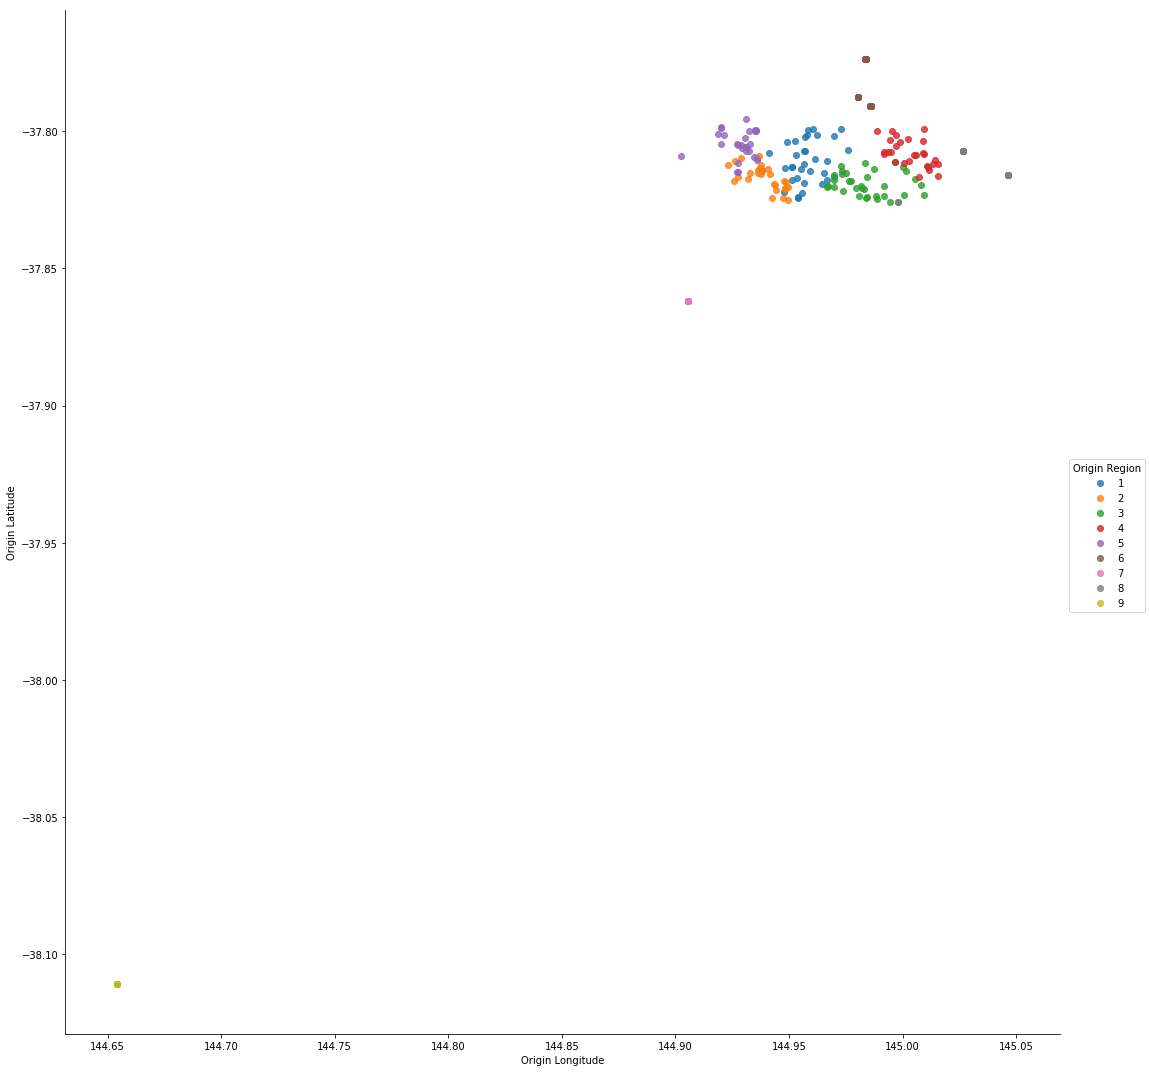

In [10]:
lat1 = df["Origin Latitude"]
long1 = df["Origin Longitude"]
sns.lmplot('Origin Longitude','Origin Latitude', data=df,hue='Origin Region',fit_reg=False,size=15 ) ## making scatter plot og orgin latitude and longitude


In [11]:
import numpy as np
from sklearn.cluster import KMeans
clus=pd.read_csv('nodes.csv')
f1 = clus['lat'].values
f2 = clus['lon'].values
X = np.array(list(zip(f1, f2)))
kmeans = KMeans(n_clusters=9).fit(X)
labels = kmeans.predict(X)
labels   

array([1, 1, 1, ..., 6, 6, 6])

##  Error in Shortest Distance

In [12]:
# reading the data from the csv file
nodes = pd.read_csv("nodes.csv")
# renaming the column 1 as Id
nodes.rename(columns={'Unnamed: 0':'Id'}, inplace=True)
# reading the edges from edges.csv file
edges=pd.read_csv("edges.csv")


In [13]:
# function get latitute and longitute as the parameters and return the list.
def getId(lat,lon):
    #return the list of latitutes and longitutes where data latitute and longitute matches to nodes.csv latitute and longitute
    return nodes.index[(nodes['lon']==lon) & (nodes['lat']==lat)].tolist()
# empty list
nodie=[]
# creating the new data frame columns for origin Id
df['Orgin Id']=0
# creating the new data frame columns for destination Id
df['Destination Id']=0
#interating over the data frame rows
for index,row in df.iterrows():
    # getting the origin longitute
    olon=row['Origin Longitude']
    # getting the origin Latitude
    olat=row['Origin Latitude']
    # getting the destination longitute
    dlon=row['Destination Longitude']
    # getting the destination Latitude
    dlat=row['Destination Latitude']
    # calling the getId function to get the latitute and longitute from the nodes.csv
    onod=getId(olat,olon)
     #setting up the origin Id in the data frame
    df.loc[index,'Orgin Id']= nodes.loc[onod[0],'Id']
    dnod=getId(dlat,dlon)
    #setting up the destination Id in the data frame
    df.loc[index,'Destination Id']= nodes.loc[dnod[0],'Id']


In [14]:
# creating the grah using edges for dijkstra algorthim
G = nx.from_pandas_edgelist(edges,'u','v',['distance(m)'])
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 17117\nNumber of edges: 25491\nAverage degree:   2.9784'

In [15]:
# initializing the new Shortest Distance(cal) column in the data frame
df['Shortest Distance(cal)']=0
# initializing the new Time for journey(cal) column in the data frame
df['Time for journey(cal)']=0
# function to calculate the time of the journey
def caculatetime(path):
    tt = 0
    # iterating till the path and get the time.
    for i in range(len(path)-1):
        tt = tt + (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['distance(m)'].values[0] * 1.0 * 3600) / (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['speed(km/h)'].values[0] * 1000)
    return tt
# iterating over the data frame to use dijkstra algorithm
for index,val in df.iterrows():
    #dijkstra algorithm to get the shortest distance and speed
    d,p = nx.single_source_dijkstra(G,source=val['Orgin Id'], target=val['Destination Id'],weight='distance(m)')    
    print('Shortest Distance:', d)
    print('Paths:', p)
    # assigning the shortest distance in the data frame
    df.loc[index,'Shortest Distance(cal)']=d
    # getting time from calculate time function
    time=caculatetime(p)
    print("Time:",time)
    # assigning the Time for journey(cal) in the data frame by time
    df.loc[index,'Time for journey(cal)']=time
    

Shortest Distance: 8361.0
Paths: [1889485053, 1889062900.0, 2978793339.0, 4283908182.0, 4283908181.0, 4283908179.0, 2236727788.0, 4283908175.0, 4283908174.0, 4283908170.0, 2236727766.0, 2481930672.0, 2481930673.0, 2481930669.0, 250480659.0, 250480672.0, 250480677.0, 2672365503.0, 250480662.0, 35301705.0, 332797060.0, 332796790.0, 332797041.0, 35301704.0, 2967053356.0, 2967053349.0, 332796855.0, 3807748049.0, 686217260.0, 2695729275.0, 686217259.0, 332796854.0, 30287595.0, 1982297474.0, 3427761887.0, 781118652.0, 583473687.0, 2481930530.0, 781120729.0, 30287594.0, 3830161454.0, 129291097.0, 129291065.0, 129288610.0, 227324737.0, 1404221281.0, 227330394.0, 227330469.0, 227330419.0, 227330518.0, 356080190.0, 1404221279.0, 1404223615.0, 2281655420.0, 498680515.0, 1521014625.0, 2936354302.0, 1404219801.0, 1521014653.0, 1982329493.0, 1982329495.0, 30287518.0, 332127537.0, 227324436.0, 384017930.0, 227324361.0, 332127589.0, 356478170.0, 227315809.0, 227770511.0, 227770439.0, 227770459.0, 2277

Time: 1995.7200000000003
Shortest Distance: 1583.0
Paths: [581701516, 581704817.0, 580001776.0, 400753602.0, 400753610.0, 41667993.0, 290048317.0, 290048306.0, 33366754.0, 310727922.0, 310727772.0, 3797989291.0, 560997297.0, 310727773.0, 310727778.0, 560997188.0, 310727779.0, 709953306.0, 634784031.0, 634784030.0, 634784023.0, 634784034.0, 310727784.0, 634784125.0, 634784134.0, 634777956.0, 301545267.0, 710034716.0, 710034749.0, 710034729.0, 710034740.0, 301545273.0, 634777975.0, 1560149561.0, 1560149497.0, 5292513667.0, 1560149567.0, 301545277.0, 6024429121.0, 6024429120.0, 6024429127.0]
Time: 430.08000000000015
Shortest Distance: 8210.0
Paths: [3589872341, 3589872333.0, 373647142.0, 373656306.0, 373649831.0, 373649829.0, 373649798.0, 373644207.0, 30286983.0, 52510917.0, 3285622990.0, 30286987.0, 560997596.0, 560997597.0, 290048306.0, 310727923.0, 306905310.0, 571460260.0, 1132070452.0, 26680084.0, 3313036364.0, 3970811103.0, 305106971.0, 3394730432.0, 3394730433.0, 332544866.0, 33254

Time: 1088.2799999999997
Shortest Distance: 44395.0
Paths: [1725216340, 137181013.0, 364329376.0, 312718912.0, 880187107.0, 52600120.0, 1725216525.0, 137180950.0, 312718318.0, 3171517001.0, 312718901.0, 33238476.0, 1900213536.0, 1900213537.0, 775942584.0, 775942517.0, 989874281.0, 1900213541.0, 775942445.0, 775945827.0, 775942452.0, 5982185669.0, 775942455.0, 6167441014.0, 2190483578.0, 4326586179.0, 4326586180.0, 2190483598.0, 6167441007.0, 3327893028.0, 2666058371.0, 6167489375.0, 55722470.0, 777765347.0, 317903855.0, 55723357.0, 774501421.0, 33675544.0, 3161948922.0, 33675617.0, 703554590.0, 319159699.0, 6167489387.0, 3306876671.0, 3306876672.0, 3306876673.0, 3306876674.0, 2384097340.0, 1835199890.0, 2185303494.0, 387266410.0, 387266443.0, 4952478803.0, 1833115017.0, 2291073998.0, 1492153099.0, 1492153096.0, 1492153091.0, 1492153102.0, 1492145833.0, 1492145817.0, 1492145782.0, 2291074009.0, 1492145781.0, 1492145850.0, 1492145816.0, 1492145788.0, 1492145844.0, 6167231010.0, 289607026

Time: 11341.56
Shortest Distance: 6103.0
Paths: [2204638282, 2204643308.0, 2204643319.0, 4297530195.0, 4297530197.0, 4297530201.0, 2204643278.0, 2204643289.0, 2204643315.0, 4297530207.0, 4297530210.0, 4297530213.0, 4283908114.0, 4283908116.0, 5290706361.0, 5290706354.0, 5290706353.0, 2189377524.0, 4283908123.0, 4283908122.0, 2189377507.0, 4283908138.0, 4283908143.0, 4283908160.0, 4283908889.0, 4283908893.0, 6167359485.0, 4283908898.0, 4148228277.0, 1449431606.0, 1449431372.0, 4148228281.0, 6167357865.0, 1449431576.0, 6167344589.0, 6167344551.0, 2247277142.0, 2247277141.0, 6167344532.0, 6167344364.0, 6167265869.0, 2383211230.0, 2187975166.0, 2187975167.0, 2383211231.0, 6167441081.0, 6167441072.0, 4326586218.0, 2190564626.0, 2190564628.0, 4326586220.0, 6167440950.0, 2247274906.0, 4520380542.0, 2189161533.0, 2189161530.0, 4520380545.0, 2247182215.0, 6167191709.0, 6167191697.0, 2174963246.0, 6167230986.0, 3945799032.0, 3945799035.0, 2174963237.0, 3945799036.0, 2174950792.0, 6167191689.0, 8

Time: 1645.979999999999
Shortest Distance: 43284.0
Paths: [5002706670, 5712522539.0, 5712522541.0, 5476597841.0, 1608179445.0, 253027685.0, 253027680.0, 253027678.0, 506050308.0, 6024429133.0, 2886390252.0, 506050894.0, 307349873.0, 709709814.0, 60653725.0, 635530379.0, 60653733.0, 3970811101.0, 400738474.0, 26680059.0, 26680057.0, 571459351.0, 571460260.0, 560997595.0, 400753614.0, 41667993.0, 52506648.0, 76461995.0, 33366761.0]
Time: 10333.499999999996
Shortest Distance: 50797.0
Paths: [5002706670, 5712522539.0, 2397324992.0, 531390718.0, 301537544.0, 2397324990.0, 301537543.0, 560986691.0, 301537542.0, 301537541.0, 2642814897.0, 3810637313.0, 3365775189.0, 758611374.0, 758612178.0, 122765960.0, 560988348.0, 531390737.0, 5682688503.0, 553459306.0, 3743608246.0, 41675664.0, 591224041.0, 92149884.0, 4442505890.0, 163634513.0, 207141377.0, 591258553.0, 163627875.0, 591259275.0, 157861192.0, 1728565030.0, 591259270.0, 591259268.0, 157861191.0, 591259264.0, 1668523263.0, 591261654.0, 5912

Time: 3757.2600000000007
Shortest Distance: 44982.0
Paths: [202488087, 202520393.0, 202520394.0, 202520397.0, 2401378847.0, 202520404.0, 3326880153.0, 3326880159.0, 130043042.0, 1112411377.0, 3790949324.0, 30942488.0, 1112411443.0, 702351321.0, 702351320.0, 76461995.0, 52506648.0, 41667993.0, 400753614.0, 560997595.0, 571460260.0, 571459351.0, 26680057.0, 26680059.0, 400738474.0, 3970811101.0, 60653733.0, 635530379.0, 60653725.0, 709709814.0, 307349873.0, 506050894.0, 2886390252.0, 6024429133.0, 506050308.0, 253027678.0, 253027680.0, 253027685.0, 1608179445.0, 5476597841.0, 5712522541.0, 5712522539.0, 5002706670.0]
Time: 10876.32
Shortest Distance: 49777.0
Paths: [5002706670, 5712522539.0, 2397324992.0, 531390718.0, 531390714.0, 531390712.0, 2347007243.0, 1132014848.0, 1132023798.0, 1132023800.0, 1132053694.0, 1132023820.0, 1132023814.0, 1132023816.0, 636708808.0, 711784381.0, 711785484.0, 711783720.0, 636707596.0, 560985148.0, 560985149.0, 711783259.0, 377541501.0, 711782080.0, 919711

Time: 3374.5800000000004
Shortest Distance: 5110.0
Paths: [575524466, 575524475.0, 575524478.0, 575524480.0, 575524483.0, 575524485.0, 575524488.0, 576824412.0, 576824420.0, 576840457.0, 576824181.0, 576824195.0, 575469226.0, 5221319827.0, 5221319826.0, 579402276.0, 575470188.0, 60096860.0, 5922126223.0, 266737144.0, 3494348621.0, 846570962.0, 846571483.0, 1715989148.0, 591435542.0, 598156479.0, 846545707.0, 845658166.0, 845658418.0, 846545709.0, 598156578.0, 591434144.0, 1964021897.0, 1964021917.0, 1964021891.0, 1964021910.0, 1964021906.0, 5856691446.0, 2960006640.0, 2960003290.0, 3313210937.0, 294621152.0, 294620418.0, 294620718.0, 294620720.0, 294620422.0, 294620834.0, 2950388058.0, 579478395.0, 579478244.0, 579477191.0, 579482274.0, 579482160.0, 55931048.0, 579483129.0, 55931050.0, 579514099.0, 579973133.0, 579973149.0, 579984186.0, 4518640807.0, 2140984929.0, 580028683.0, 580024664.0, 580025166.0]
Time: 1286.34
Shortest Distance: 9093.0
Paths: [1390575046, 4940410885.0, 6126053594

Time: 3290.939999999997
Shortest Distance: 43126.0
Paths: [3215106491, 3215106490.0, 259616751.0, 30942994.0, 289602599.0, 289602608.0, 332544910.0, 332544859.0, 332544912.0, 3394730436.0, 3394730435.0, 289648906.0, 296027679.0, 1492131965.0, 1492131944.0, 296027574.0, 635530497.0, 1132069624.0, 60653700.0, 711763473.0, 60653717.0, 1132069623.0, 1132069653.0, 506050308.0, 253027678.0, 253027680.0, 253027685.0, 1608179445.0, 5476597841.0, 5712522541.0, 5712522539.0, 5002706670.0]
Time: 10342.74
Shortest Distance: 3196.0
Paths: [4754200370, 4754200371.0, 4754200372.0, 4754200373.0, 4754200374.0, 4754200375.0, 4754200376.0, 4754200377.0, 4754200378.0, 4754200379.0, 4754200380.0, 4754200381.0, 4754200382.0, 4754200383.0, 4754200384.0, 4754200385.0, 4754200386.0, 206204609.0, 206204610.0, 206204611.0, 206204612.0, 4754200387.0, 4754200388.0, 4754200390.0, 4754200391.0, 4754200392.0, 4754200393.0, 4754200396.0, 4754200395.0, 4754200394.0, 4754200389.0, 206204613.0, 4754200397.0, 4754200398.0

Time: 1747.8000000000002
Shortest Distance: 7521.0
Paths: [1964021918, 1964021898.0, 2768616811.0, 591431040.0, 591431019.0, 591431020.0, 591430822.0, 591430819.0, 741702160.0, 1985561682.0, 6167254953.0, 6167254945.0, 576878119.0, 6167344562.0, 1449431579.0, 1449431632.0, 1449431604.0, 1449355173.0, 1449431244.0, 1449431441.0, 1449431533.0, 1449431263.0, 1449431623.0, 1449355158.0, 741702068.0, 1449355145.0, 1449297324.0, 650267588.0, 1449297305.0, 1879021160.0, 5276517410.0, 650269226.0, 650270799.0, 650270229.0, 650272246.0, 650276838.0, 650277273.0, 2501490564.0, 2501489820.0, 3862791979.0, 370751653.0, 241807179.0, 370749284.0, 3146808070.0, 3146808061.0, 416832108.0, 2325395496.0, 1713449450.0, 370749868.0, 4287120807.0, 370751058.0, 1713449451.0, 2325319092.0, 2325319093.0, 1713449453.0, 1713449452.0, 356083796.0, 248746698.0, 248746706.0, 248746724.0, 248746627.0, 420022666.0, 248746628.0, 6207106485.0, 393115051.0, 248746629.0, 3168663491.0, 4315827363.0, 30947902.0, 431582736

Time: 1533.5400000000002
Shortest Distance: 2401.0
Paths: [477077883, 477077882.0, 233274930.0, 2096319043.0, 477079437.0, 477079436.0, 6207152062.0, 6207152060.0, 767644348.0, 2384091381.0, 767645839.0, 767610869.0, 767592197.0, 767652542.0, 2384091387.0, 2384091386.0, 6212705501.0, 767586829.0, 767586831.0, 6167359507.0, 6167359506.0, 589449808.0, 589449502.0, 2324975784.0, 4998966834.0, 2324975791.0, 4998966831.0, 2948774564.0, 2948774569.0, 577474522.0, 60091598.0]
Time: 663.06
Shortest Distance: 10322.0
Paths: [1390575046, 4940410885.0, 6126053594.0, 2400295351.0, 5457975847.0, 1668523241.0, 387704653.0, 387921006.0, 387921009.0, 1668523264.0, 1668523273.0, 92159669.0, 591407999.0, 1668523281.0, 267317634.0, 2189269632.0, 2189269630.0, 2189269631.0, 4520380553.0, 4520380554.0, 4520380435.0, 589499478.0, 591392674.0, 6167247310.0, 591392087.0, 591408273.0, 591408272.0, 1833110275.0, 6167247287.0, 3306900957.0, 2189156621.0, 4520380546.0, 6167191721.0, 4520380540.0, 2189161530.0, 21

Time: 1938.7799999999995
Shortest Distance: 9688.0
Paths: [1390575046, 4940410885.0, 6126053594.0, 2400295351.0, 5457975847.0, 1668523241.0, 387704653.0, 387921006.0, 387921009.0, 1668523264.0, 1668523273.0, 92159669.0, 591407999.0, 1668523281.0, 267317634.0, 2189269632.0, 2189269630.0, 2189269631.0, 4520380553.0, 4520380554.0, 4520380435.0, 589499478.0, 591392674.0, 6167247310.0, 591392087.0, 591408273.0, 591408272.0, 1833110275.0, 6167247287.0, 3306900957.0, 2189156621.0, 4520380546.0, 6167191721.0, 4520380540.0, 2189161530.0, 2189161536.0, 4520380539.0, 2189145403.0, 6167191177.0, 2189145377.0, 2189145378.0, 2189145398.0, 6167413280.0, 2279006915.0, 2177124617.0, 2177124614.0, 2177124622.0, 2177124624.0, 2177124623.0, 6167417888.0, 3313046869.0, 2174950855.0, 4315294437.0, 4315294438.0, 4315294439.0, 2174950856.0, 2442297401.0, 6167231006.0, 1433204920.0, 2324025352.0, 1960476767.0, 5630513723.0, 2173278061.0, 818102529.0, 2586245662.0, 247532480.0, 2304718102.0, 711766722.0, 711766

Time: 10632.779999999997
Shortest Distance: 6629.0
Paths: [5587121107, 36819910.0, 122860230.0, 144730304.0, 144699879.0, 144730344.0, 144694832.0, 144730372.0, 2189145406.0, 2189156621.0, 136525654.0, 2189158015.0, 2189156624.0, 2188421311.0, 136511965.0, 136510152.0, 136507806.0, 136509229.0, 6167489489.0, 607756857.0, 607756858.0, 128982276.0, 113536277.0, 128982235.0, 113541105.0, 113541129.0, 607756402.0, 113535163.0, 6167247326.0, 2190478937.0, 4326586225.0, 4326586224.0, 4326586223.0, 2190478940.0, 6167247329.0, 114607245.0, 114607264.0, 6060217812.0, 114569851.0, 126919692.0, 594192913.0, 114577426.0, 114581307.0, 591321361.0, 114583003.0, 126934535.0, 1457647365.0, 6167266606.0, 5827671676.0, 1838361782.0, 5827671677.0, 6167265866.0, 592818918.0, 130015095.0, 592814484.0, 130015093.0, 120947918.0, 6167344361.0, 26051949.0, 1985557921.0, 6167344535.0, 247028658.0, 247028711.0, 247024616.0, 247028810.0, 247028852.0, 588190422.0, 247025142.0, 6167344556.0, 26051948.0, 2384091391.

Time: 11307.24
Shortest Distance: 2633.0
Paths: [686217262, 781120098.0, 781120997.0, 127538409.0, 746341037.0, 746341029.0, 746341027.0, 128876901.0, 128876893.0, 128876884.0, 2005992020.0, 129279833.0, 385026714.0, 385026716.0, 1521014622.0, 1521014723.0, 1521014674.0, 129279422.0, 31477171.0, 38779052.0, 248969197.0, 227324606.0, 356474935.0, 227324666.0, 356474868.0, 30287517.0, 356474514.0, 227324563.0, 356474318.0, 227324482.0, 356474249.0, 30287526.0, 227324415.0, 361775706.0, 31477170.0, 233246902.0, 401505830.0, 615170558.0, 227770421.0, 2213981032.0, 31477169.0, 2213981047.0, 4307007287.0]
Time: 667.9800000000001
Shortest Distance: 11711.0
Paths: [4307007286, 2213981032.0, 2213981044.0, 2213981059.0, 2213981040.0, 2213981043.0, 4297530224.0, 55861404.0, 2213857170.0, 460411875.0, 6221450549.0, 6219293732.0, 4283908128.0, 4283908129.0, 233578120.0, 2346846625.0, 233578163.0, 2346846623.0, 233578139.0, 307349677.0, 5680175257.0, 650272629.0, 2501489817.0, 650272644.0, 650273629

Time: 936.9599999999999
Shortest Distance: 10337.0
Paths: [634775005, 634775004.0, 634774998.0, 634783937.0, 634783578.0, 634784032.0, 634784025.0, 634784024.0, 634784023.0, 634784034.0, 310727784.0, 634783795.0, 310728100.0, 441587192.0, 310728101.0, 310729981.0, 400738487.0, 310729984.0, 400738477.0, 709707024.0, 3970811101.0, 3313036363.0, 3313036364.0, 3970811103.0, 305106971.0, 3394730432.0, 3394730433.0, 332544866.0, 332544858.0, 332544910.0, 289602608.0, 289602599.0, 30942994.0, 259616751.0, 2266563639.0, 4952477289.0, 2266563662.0, 2266563659.0, 30467863.0, 5642440937.0, 4520380494.0, 4520380493.0, 296038801.0, 836196624.0, 3161949478.0, 3161949480.0, 3161948915.0, 3161948917.0, 3161948949.0, 317729584.0, 6167489396.0, 3161948922.0, 33675544.0, 774501421.0, 774501396.0, 317903910.0, 1923401354.0, 2325395493.0, 2325395490.0, 2666106696.0, 2325395487.0, 3933094363.0, 2190483581.0, 4326586182.0, 4326586181.0, 2190483585.0, 6167441019.0, 3213448170.0, 3213448167.0, 3213448164.0, 32

Time: 1248.9600000000003
Shortest Distance: 50797.0
Paths: [5002706670, 5712522539.0, 2397324992.0, 531390718.0, 301537544.0, 2397324990.0, 301537543.0, 560986691.0, 301537542.0, 301537541.0, 2642814897.0, 3810637313.0, 3365775189.0, 758611374.0, 758612178.0, 122765960.0, 560988348.0, 531390737.0, 5682688503.0, 553459306.0, 3743608246.0, 41675664.0, 591224041.0, 92149884.0, 4442505890.0, 163634513.0, 207141377.0, 591258553.0, 163627875.0, 591259275.0, 157861192.0, 1728565030.0, 591259270.0, 591259268.0, 157861191.0, 591259264.0, 1668523263.0, 591261654.0, 591261651.0, 49492943.0, 591261644.0, 591261641.0, 157849660.0, 1668523256.0, 2400295351.0, 6126053594.0, 4940410885.0, 1390575046.0]
Time: 13204.979999999994
Shortest Distance: 2627.0
Paths: [202519514, 202519515.0, 202520393.0, 202520394.0, 202520397.0, 2401378847.0, 202520404.0, 3326880153.0, 3326880159.0, 130043040.0, 1112411372.0, 130042868.0, 130043112.0, 202473725.0, 4794459318.0, 4794459427.0, 30942487.0, 583063758.0, 37909493

Time: 941.8799999999999
Shortest Distance: 51032.0
Paths: [5002706670, 5712522539.0, 2397324992.0, 531390718.0, 531390714.0, 531390712.0, 2347007243.0, 1132014848.0, 1132023798.0, 1132023800.0, 1132053694.0, 1132023820.0, 1132023814.0, 1132023816.0, 636708808.0, 711784381.0, 711785484.0, 711783720.0, 636707596.0, 560985148.0, 560985149.0, 711783259.0, 377541501.0, 711782080.0, 91971130.0, 711782071.0, 91971135.0, 377541452.0, 91970805.0, 2304718106.0, 2304718104.0, 711778936.0, 711778937.0, 289607026.0, 6167231010.0, 1492145844.0, 1492145788.0, 1492145816.0, 1492145850.0, 1492145781.0, 2291074009.0, 1492149379.0, 6167489359.0, 2948774548.0, 2948774551.0, 6167289326.0, 6167289325.0, 6167289309.0, 767584149.0, 6167357841.0, 767582209.0, 767653222.0, 2384091380.0, 1889089757.0, 2384091382.0, 4723274546.0, 1889073821.0, 2970964556.0, 355818807.0, 129952492.0, 2978793339.0, 1889062900.0, 1889485053.0]
Time: 12681.060000000005
Shortest Distance: 7312.0
Paths: [304700558, 214092481.0, 2140924

Time: 4911.599999999998
Shortest Distance: 4187.0
Paths: [2766300600, 2766300598.0, 34160616.0, 34160613.0, 2766300602.0, 2707996412.0, 2707996427.0, 767671823.0, 34160610.0, 767670317.0, 2766300604.0, 34157905.0, 1691676459.0, 3199584808.0, 2181275344.0, 2181268826.0, 6167289319.0, 2841675045.0, 2291073960.0, 6167289314.0, 6167289315.0, 6167344498.0, 6167289317.0, 6167289316.0, 6167344384.0, 6167266648.0, 6167266647.0, 4120677316.0, 4120677317.0, 6167266591.0, 1558806055.0, 2187770708.0, 2187770698.0, 2187770695.0, 1558806077.0, 6167266619.0, 176703213.0, 176703234.0, 176703266.0, 3066173175.0, 593055517.0, 2776394281.0, 2776394279.0, 2776396935.0, 2776396941.0, 589431853.0, 1327098219.0, 598347137.0, 598347148.0, 598401578.0, 598401527.0, 598405144.0, 6167441067.0, 6167440977.0, 6167440976.0, 6167440975.0, 6167440974.0, 4326586214.0, 2190478934.0, 6167440966.0, 3132499903.0, 103293548.0, 103295646.0, 611984646.0, 103299651.0, 145261423.0, 103301615.0, 145261535.0, 6167489470.0, 20208

Time: 3537.119999999999
Shortest Distance: 47186.0
Paths: [5002706670, 5712522539.0, 2397324992.0, 531390718.0, 531390714.0, 531390712.0, 2347007243.0, 1132014848.0, 1132023798.0, 1132023800.0, 1132053694.0, 1132023820.0, 1132023814.0, 1132023816.0, 636708808.0, 711784381.0, 711785484.0, 711783720.0, 636707596.0, 560985148.0, 560985149.0, 711783259.0, 377541501.0, 711782080.0, 91971130.0, 711782071.0, 91971135.0, 377541452.0, 91970805.0, 2304718106.0, 2304718104.0, 711778936.0, 711778937.0, 289607026.0, 6167231010.0, 1492145844.0, 1492145788.0, 1492145816.0, 1492145850.0, 1492145781.0, 2291074009.0, 1492149379.0, 6167489359.0, 2948774548.0, 2948774551.0, 6167289326.0, 6167289325.0, 6167289309.0, 767584149.0, 6167357841.0, 767582209.0, 767653222.0, 767593284.0, 796798542.0, 767647073.0, 2384091376.0, 767587081.0, 767665017.0, 266734205.0, 266734181.0, 4297530206.0, 652430413.0, 4297530210.0, 30287464.0, 4297530211.0, 4297530209.0, 4297530202.0, 580090245.0, 418987991.0, 683138398.0, 302

Time: 1003.6800000000005
Shortest Distance: 5468.0
Paths: [4157118505, 248746927.0, 3804564126.0, 248746924.0, 30385739.0, 266740081.0, 248746916.0, 248746917.0, 343315451.0, 248746918.0, 30404319.0, 248746937.0, 266739826.0, 266739853.0, 266739855.0, 266739856.0, 3810929408.0, 577455294.0, 266739818.0, 577455271.0, 1497170573.0, 266739858.0, 577455248.0, 4380043477.0, 266739860.0, 576845616.0, 576845696.0, 714861714.0, 418539889.0, 1445473969.0, 60088786.0, 3983269226.0, 60088704.0, 60096789.0, 60096725.0, 60095043.0, 60096157.0, 576834101.0, 60096109.0, 1449295048.0, 1449285250.0, 1449266841.0, 1449285243.0, 1449285264.0, 1449285248.0, 1449266733.0, 2302923329.0, 1879021163.0, 2302923326.0, 1879021164.0, 650269460.0, 650270229.0, 278913068.0, 650274000.0, 5276518425.0, 2302316260.0, 2302316258.0, 1879021180.0, 278912937.0, 2392803738.0, 1879021173.0, 269335115.0, 269335114.0, 416817424.0, 4248528827.0, 269335261.0, 4283908127.0, 4283908125.0, 4283908124.0, 30945575.0, 224750232.0, 37

Time: 13204.979999999994
Shortest Distance: 43271.0
Paths: [5002706670, 5712522539.0, 2397324992.0, 531390718.0, 531390714.0, 531390712.0, 2347007243.0, 1132014848.0, 1132023798.0, 1132023800.0, 1132053694.0, 1132023820.0, 1132023814.0, 1132023816.0, 636708808.0, 711784381.0, 711785484.0, 711783720.0, 636707596.0, 560985148.0, 560985149.0, 711783259.0, 377541501.0, 711782080.0, 91971130.0, 711782071.0, 91971135.0, 377541452.0, 91970805.0, 2304718106.0, 2304718104.0, 711778936.0, 711778937.0, 289607026.0, 6167231010.0, 1492145844.0, 1492145788.0, 1492145816.0, 1492145850.0, 1492145781.0, 2291074009.0, 1492145782.0, 1492145817.0, 1492145833.0, 1492153102.0, 1492153091.0, 1492153096.0, 1492153099.0, 2291073998.0, 1833115017.0, 4952478803.0, 387266443.0, 387266410.0, 2185303494.0, 1835199890.0, 2384097340.0, 3306876674.0, 3306876673.0, 3306876672.0, 3306876671.0, 6167489387.0]
Time: 10468.140000000005
Shortest Distance: 13169.0
Paths: [1390575046, 4940410885.0, 6126053594.0, 2400295351.0, 

Time: 11496.6
Shortest Distance: 4349.0
Paths: [664378472, 664378470.0, 664378469.0, 664378468.0, 664378467.0, 664378466.0, 664378465.0, 664378464.0, 664378463.0, 664378462.0, 387700302.0, 847533460.0, 664378473.0, 4398351515.0, 1905004354.0, 845692519.0, 4162427914.0, 4162427915.0, 846546204.0, 846545732.0, 846546009.0, 598156479.0, 598155989.0, 591431033.0, 6167254973.0, 3882858365.0, 741702228.0, 1985561682.0, 1985561684.0, 6167254954.0, 6167254940.0, 6167254939.0, 6167344559.0, 6167344558.0, 6167254931.0, 6167254932.0, 6167344582.0, 6167344583.0, 6167344584.0, 247032073.0, 588194210.0, 588194357.0, 6167191744.0, 1449431206.0, 1449431554.0, 6167357867.0, 1449431510.0, 1449431625.0, 1449431342.0, 1449431236.0, 1449431448.0, 1449431465.0, 4283908899.0, 4283908894.0, 4283908890.0, 4283908186.0, 2189398730.0, 4283908162.0, 4283908159.0, 2189398750.0, 2189398733.0, 170219377.0, 170219402.0, 3419344109.0, 4283908120.0, 4283908119.0, 5290706370.0, 30287465.0, 4283908115.0, 4297530215.0, 42

Time: 1004.82
Shortest Distance: 5962.0
Paths: [304700558, 214092481.0, 214092477.0, 2176972920.0, 2621587187.0, 2621587189.0, 2621587191.0, 723973403.0, 723973453.0, 299023766.0, 277363224.0, 723975301.0, 277362806.0, 4283908179.0, 2236727788.0, 4283908175.0, 4283908174.0, 4283908170.0, 250480649.0, 30947983.0, 2236727832.0, 2236727826.0, 2692003111.0, 2692003113.0, 5172837974.0, 2692003116.0, 2692003115.0, 4315827364.0, 3168663488.0, 4315827365.0, 4315827366.0, 4315827369.0, 356087677.0, 248746741.0, 248746737.0, 30385491.0, 30385496.0, 30385495.0, 30385488.0, 1982456959.0, 356089330.0, 4315295113.0, 4157116177.0, 419481489.0, 356089138.0, 30404321.0, 4157116171.0, 4157116173.0, 4157116160.0, 1463620472.0, 1463620734.0, 1463620434.0, 4157116151.0, 1449316603.0, 1449308562.0, 1449308614.0, 1449308625.0, 356127080.0, 356127457.0, 576837332.0, 576831013.0, 60096724.0, 60096725.0, 60096788.0, 576834725.0, 6226313842.0, 6226313846.0, 575467530.0, 575434506.0, 575472974.0, 575524495.0, 600

Time: 809.5200000000002
Shortest Distance: 2944.0
Paths: [2442297405, 2442297407.0, 2442297410.0, 2442297413.0, 2442297416.0, 2442297419.0, 5630513726.0, 1433204920.0, 2324025352.0, 6167417907.0, 6167417902.0, 6167231017.0, 6167231007.0, 1492150985.0, 1492150939.0, 1492150984.0, 1492150982.0, 1492150966.0, 6167278763.0, 6167278759.0, 6167278758.0, 1492149379.0, 6167489359.0, 579986615.0, 579984177.0, 579984186.0, 4518640807.0, 2140984929.0, 580028683.0, 580024664.0, 3260985583.0, 3094967060.0, 2142179147.0, 95559042.0, 95554479.0]
Time: 790.68
Shortest Distance: 43923.0
Paths: [5002706670, 5712522539.0, 5712522541.0, 5476597841.0, 1608179445.0, 253027685.0, 253027680.0, 253027678.0, 506050308.0, 6024429133.0, 2886390252.0, 506050894.0, 307349873.0, 709709814.0, 60653725.0, 635530379.0, 60653733.0, 3970811101.0, 400738474.0, 26680059.0, 26680057.0, 571459351.0, 571460260.0, 560997595.0, 400753614.0, 400753610.0, 400753602.0, 580001776.0, 400753574.0, 401416162.0, 401416147.0, 400753550.

Time: 1511.8800000000003
Shortest Distance: 9946.0
Paths: [1390575046, 4940410885.0, 6126053594.0, 2400295351.0, 5457975847.0, 1668523241.0, 387704653.0, 387921006.0, 387921009.0, 1668523264.0, 1668523273.0, 92159669.0, 591407999.0, 1668523281.0, 267317634.0, 2189269632.0, 2189269630.0, 2189269631.0, 4520380553.0, 4520380554.0, 4520380435.0, 589499478.0, 591392674.0, 6167247310.0, 591392087.0, 591408273.0, 591408272.0, 1833110275.0, 6167247287.0, 3306900957.0, 2189156621.0, 4520380546.0, 6167191721.0, 4520380540.0, 2189161530.0, 2189161536.0, 4520380539.0, 6167191176.0, 4520380537.0, 6167413278.0, 4520380532.0, 2189162945.0, 2189162944.0, 4520380535.0, 2189145380.0, 6167417927.0, 2189145401.0, 3394725585.0, 2189145392.0, 2189145389.0, 6167236641.0, 2189145384.0, 3543024079.0, 2189145385.0, 4520380503.0, 4520380502.0, 4520380516.0, 2189145388.0, 4520380518.0, 6167285762.0, 2189149376.0, 2384097341.0, 387266357.0, 2185303494.0, 387266428.0, 387266341.0, 387266338.0, 259616751.0, 32151064

Time: 3781.3799999999983
Shortest Distance: 45864.0
Paths: [5002706670, 5712522539.0, 2397324992.0, 531390718.0, 301537544.0, 2397324990.0, 301537543.0, 301537538.0, 301537536.0, 301537532.0, 307349874.0, 2346984244.0, 2346984246.0, 60653715.0, 1132053705.0, 844410211.0, 60653714.0, 92141618.0, 3276407461.0, 92138359.0, 92139159.0, 1217532917.0, 301542621.0, 301544524.0, 3259282309.0, 827048477.0, 6200184392.0, 301544536.0, 301544535.0, 36823180.0, 36823673.0, 506043053.0, 506155264.0, 6167191687.0, 3945799030.0, 3945799029.0, 3945799027.0, 3945799025.0, 6167230989.0, 2174963240.0, 6167191696.0, 6167191708.0, 2247182216.0, 4520380544.0, 2189161536.0, 2189161535.0, 4520380543.0, 2247274908.0, 6167440951.0, 4326586219.0, 2190564625.0, 2190564627.0, 4326586217.0, 6167441071.0, 6167441080.0, 2383211229.0, 2187975163.0, 2187975164.0, 2383211228.0, 6167265870.0, 6167344365.0, 6167344531.0, 2247277142.0, 6167344551.0, 6167344589.0, 1449431576.0, 1449431526.0, 1449431625.0, 1449431597.0, 14494

Time: 1712.5799999999997
Shortest Distance: 2842.0
Paths: [1271016180, 253027670.0, 253027671.0, 253027672.0, 253027673.0, 253027674.0, 253027675.0, 253027676.0, 253027677.0, 253027678.0, 506050308.0, 6024429133.0, 2886390252.0, 506050894.0, 307349873.0, 709709814.0, 60653725.0, 635530379.0, 60653733.0, 3970811101.0, 400738474.0, 26680059.0, 26680057.0, 571459351.0, 571460260.0, 560997595.0, 400753614.0, 400753610.0, 400753602.0, 580001776.0, 400753574.0, 202772778.0, 202772784.0, 580001002.0, 581706377.0, 581706614.0, 581706635.0, 202767927.0, 202767928.0, 581709429.0, 581709563.0, 581708504.0, 581708500.0]
Time: 678.84
Shortest Distance: 49777.0
Paths: [5002706670, 5712522539.0, 2397324992.0, 531390718.0, 531390714.0, 531390712.0, 2347007243.0, 1132014848.0, 1132023798.0, 1132023800.0, 1132053694.0, 1132023820.0, 1132023814.0, 1132023816.0, 636708808.0, 711784381.0, 711785484.0, 711783720.0, 636707596.0, 560985148.0, 560985149.0, 711783259.0, 377541501.0, 711782080.0, 91971130.0, 711

Time: 1719.1199999999997
Shortest Distance: 3836.0
Paths: [4307007286, 2213981032.0, 31477169.0, 2213981047.0, 4297530196.0, 4297530199.0, 4297530200.0, 2213981051.0, 2213981065.0, 2213981052.0, 4297530225.0, 302135272.0, 224750459.0, 224750410.0, 3774995964.0, 3774995963.0, 372992165.0, 3774998963.0, 2358071076.0, 2358071077.0, 628761345.0, 2368035914.0, 269335260.0, 30945575.0, 4283908124.0, 2189382624.0, 2189382612.0, 2189382598.0, 4283908120.0, 3419344109.0, 170219402.0, 170219377.0, 2189398733.0, 2189398750.0, 4283908159.0, 2317966814.0, 268533993.0, 5928027852.0, 268533990.0, 2227263908.0, 4283908889.0, 4283908893.0, 6167359485.0, 4283908898.0, 4148228277.0, 1449431606.0, 1449431372.0, 4148228281.0, 6167357865.0, 1449431576.0, 6167344589.0, 6167344551.0, 2247277142.0, 2247277141.0, 6167344532.0, 6167344364.0, 6167265869.0]
Time: 1058.3999999999999
Shortest Distance: 7461.0
Paths: [781109177, 781109171.0, 781109166.0, 781109163.0, 781109160.0, 781109157.0, 6222911349.0, 207085717.

Time: 12681.060000000005
Shortest Distance: 2444.0
Paths: [728165670, 728165673.0, 3130999246.0, 3130999251.0, 728165678.0, 2089593081.0, 2089593079.0, 2089593076.0, 2089593074.0, 4283908184.0, 4283908182.0, 277362806.0, 723975301.0, 277363224.0, 299023766.0, 723973453.0, 723973403.0, 2621587191.0, 2621587189.0, 2621587187.0, 2176972920.0, 214092477.0, 214092481.0, 304700558.0]
Time: 578.0400000000001
Shortest Distance: 48647.0
Paths: [207085833, 5668009839.0, 207085851.0, 207085868.0, 207085881.0, 207085897.0, 5668009833.0, 207085910.0, 299024283.0, 2621587191.0, 723973403.0, 723973453.0, 299023766.0, 277363224.0, 723975301.0, 277362806.0, 4283908179.0, 2236727788.0, 4283908175.0, 4283908174.0, 4283908170.0, 2236727766.0, 2236727765.0, 2236727775.0, 4283908168.0, 2237521747.0, 2237521759.0, 30947901.0, 224765801.0, 129952492.0, 355818807.0, 2970964556.0, 1889073821.0, 4723274546.0, 2384091382.0, 1889089757.0, 2384091380.0, 767653222.0, 767582209.0, 6167357841.0, 767584149.0, 616728930

Time: 1556.9399999999996
Shortest Distance: 10824.0
Paths: [1390575046, 4940410885.0, 6126053594.0, 2400295351.0, 5457975847.0, 1668523241.0, 387704653.0, 387921006.0, 387921009.0, 1668523264.0, 1668523273.0, 92159669.0, 591407999.0, 1668523281.0, 267317634.0, 2189269632.0, 2189269630.0, 2189269631.0, 4520380553.0, 4520380554.0, 4520380435.0, 589499478.0, 591392674.0, 6167247310.0, 591392087.0, 591408273.0, 591408272.0, 1833110275.0, 6167247287.0, 3306900957.0, 2189156621.0, 4520380546.0, 6167191721.0, 4520380540.0, 2189161530.0, 2189161536.0, 4520380539.0, 2189145403.0, 6167191177.0, 2189145377.0, 2189145378.0, 2189145398.0, 6167413280.0, 2279006915.0, 2177124617.0, 2177124614.0, 2177124622.0, 2177124624.0, 2177124623.0, 6167417888.0, 3313046869.0, 2174950855.0, 4315294437.0, 4315294438.0, 4315294439.0, 2174950856.0, 2442297401.0, 6167231006.0, 1433204920.0, 2324025352.0, 1960476767.0, 5630513723.0, 2173278061.0, 818102529.0, 291483922.0, 294637965.0, 2133726646.0, 2133726644.0, 21337

Time: 3552.24
Shortest Distance: 50797.0
Paths: [5002706670, 5712522539.0, 2397324992.0, 531390718.0, 301537544.0, 2397324990.0, 301537543.0, 560986691.0, 301537542.0, 301537541.0, 2642814897.0, 3810637313.0, 3365775189.0, 758611374.0, 758612178.0, 122765960.0, 560988348.0, 531390737.0, 5682688503.0, 553459306.0, 3743608246.0, 41675664.0, 591224041.0, 92149884.0, 4442505890.0, 163634513.0, 207141377.0, 591258553.0, 163627875.0, 591259275.0, 157861192.0, 1728565030.0, 591259270.0, 591259268.0, 157861191.0, 591259264.0, 1668523263.0, 591261654.0, 591261651.0, 49492943.0, 591261644.0, 591261641.0, 157849660.0, 1668523256.0, 2400295351.0, 6126053594.0, 4940410885.0, 1390575046.0]
Time: 13204.979999999994
Shortest Distance: 10545.0
Paths: [1390575046, 4940410885.0, 6126053594.0, 2400295351.0, 5457975847.0, 1668523241.0, 387704653.0, 387921006.0, 387921009.0, 1668523264.0, 1668523273.0, 92159669.0, 591407999.0, 1668523281.0, 267317634.0, 2189269632.0, 2189269630.0, 2189269631.0, 4520380553.0

Time: 3757.2600000000007
Shortest Distance: 5338.0
Paths: [2204638282, 2204643308.0, 2204643319.0, 4297530195.0, 4297530197.0, 4297530201.0, 2204643278.0, 2204643289.0, 2204643315.0, 4297530207.0, 4297530210.0, 4297530213.0, 4283908114.0, 4283908116.0, 5290706361.0, 5290706354.0, 5290706353.0, 2189377524.0, 4283908123.0, 4283908122.0, 2189377507.0, 4283908138.0, 4283908143.0, 4283908160.0, 4283908889.0, 4283908893.0, 6167359485.0, 4283908898.0, 4148228277.0, 1449431606.0, 1449431372.0, 4148228281.0, 6167357865.0, 1449431576.0, 6167344589.0, 6167344551.0, 2247277142.0, 6167344531.0, 6167344365.0, 6167265870.0, 2383211228.0, 2187975164.0, 2187975163.0, 2383211229.0, 6167441080.0, 6167441071.0, 4326586217.0, 2190564627.0, 2190564625.0, 4326586219.0, 6167440951.0, 2247274908.0, 4520380543.0, 2189161535.0, 2189161536.0, 4520380544.0, 2247182216.0, 6167191708.0, 6167191696.0, 2174963240.0, 6167230989.0, 3945799025.0, 3945799027.0, 3945799029.0, 3945799030.0, 6167191687.0, 506155264.0, 844495

Time: 4298.280000000001
Shortest Distance: 50797.0
Paths: [5002706670, 5712522539.0, 2397324992.0, 531390718.0, 301537544.0, 2397324990.0, 301537543.0, 560986691.0, 301537542.0, 301537541.0, 2642814897.0, 3810637313.0, 3365775189.0, 758611374.0, 758612178.0, 122765960.0, 560988348.0, 531390737.0, 5682688503.0, 553459306.0, 3743608246.0, 41675664.0, 591224041.0, 92149884.0, 4442505890.0, 163634513.0, 207141377.0, 591258553.0, 163627875.0, 591259275.0, 157861192.0, 1728565030.0, 591259270.0, 591259268.0, 157861191.0, 591259264.0, 1668523263.0, 591261654.0, 591261651.0, 49492943.0, 591261644.0, 591261641.0, 157849660.0, 1668523256.0, 2400295351.0, 6126053594.0, 4940410885.0, 1390575046.0]
Time: 13204.979999999994
Shortest Distance: 4259.0
Paths: [1463620910, 5656845890.0, 5656845888.0, 1463620564.0, 1463620719.0, 1463620819.0, 1463620745.0, 1463620807.0, 1463620380.0, 5636163337.0, 1463620639.0, 1463620424.0, 1463620903.0, 4072555805.0, 1463620628.0, 1463620531.0, 1463620941.0, 1463620781

Time: 3452.8199999999997
Shortest Distance: 8868.0
Paths: [844482571, 844482569.0, 844490705.0, 844482225.0, 301544568.0, 3743608239.0, 301542599.0, 589759812.0, 589760032.0, 589759832.0, 589759848.0, 1833115725.0, 122705649.0, 122705650.0, 589747750.0, 589742849.0, 1479930102.0, 1479930080.0, 1479930075.0, 589702568.0, 589702560.0, 589702555.0, 6167229081.0, 589527696.0, 589500754.0, 589501040.0, 1479905341.0, 1479905364.0, 589501824.0, 589473307.0, 6167247306.0, 6167247308.0, 3394728757.0, 5880339360.0, 6167247310.0, 591392674.0, 589499478.0, 4520380435.0, 4520380554.0, 4520380553.0, 2189269631.0, 2189269630.0, 2189269632.0, 267317634.0, 1668523281.0, 591407999.0, 92159669.0, 1668523273.0, 1668523264.0, 387921009.0, 387921006.0, 387704653.0, 1668523241.0, 5457975847.0, 2400295351.0, 6126053594.0, 4940410885.0, 1390575046.0]
Time: 3019.08
Shortest Distance: 549.0
Paths: [1490182710, 2992212835.0, 2992212836.0, 2706565048.0, 411688745.0, 2705194658.0, 2705194659.0, 2705192018.0, 270519

Time: 1931.1599999999996
Shortest Distance: 3183.0
Paths: [255058767, 589306701.0, 6167357862.0, 2279153639.0, 2189475427.0, 2189475426.0, 2279153653.0, 4746121968.0, 6167359488.0, 4746121967.0, 2227263908.0, 268533990.0, 5928027852.0, 268533993.0, 2317966814.0, 4283908159.0, 2189398750.0, 2189398733.0, 170219377.0, 170219402.0, 3419344109.0, 4283908120.0, 2189382598.0, 2189382612.0, 2189382624.0, 4283908124.0, 30945575.0, 269335260.0, 2368035914.0, 628761345.0, 2358071077.0, 2358071076.0, 3774998963.0, 372992165.0, 3774995963.0, 3774995964.0, 224750410.0, 224750459.0, 4297530222.0, 4297530225.0, 2213981052.0, 2213981065.0, 233262501.0, 233262526.0, 333901615.0, 301549275.0, 2213981040.0, 2213981059.0, 2213981044.0, 2213981032.0, 4307007286.0]
Time: 918.24
Shortest Distance: 6389.0
Paths: [3240572179, 579999689.0, 579999196.0, 202767945.0, 202761482.0, 579999252.0, 579999050.0, 579999049.0, 579999037.0, 400753521.0, 702376470.0, 3555802212.0, 3555802228.0, 3555802214.0, 3555802208.0, 3

Time: 3757.2600000000007
Shortest Distance: 5984.0
Paths: [4326586192, 2266562025.0, 4520380521.0, 4520380506.0, 2189162947.0, 2189162941.0, 4520380503.0, 2266561262.0, 1492153097.0, 1492153104.0, 1492145817.0, 1492145782.0, 1492145848.0, 1492145792.0, 1492145808.0, 1492145800.0, 6167231012.0, 1492145823.0, 307349366.0, 2133731378.0, 2133731374.0, 711749617.0, 711778909.0, 711749606.0, 1131986128.0, 711761697.0, 709844184.0, 1132069658.0, 1132069648.0, 1132069603.0, 60653717.0, 1132069623.0, 1132069653.0, 506050308.0, 6024429133.0, 6024429123.0, 6024429125.0, 6024429124.0, 6024429122.0, 6024429121.0, 301545277.0, 1560149567.0, 1560149552.0, 1560149580.0, 1560149520.0, 1560149548.0, 1560149484.0, 1560149438.0, 6021320893.0, 1271016120.0, 6021320897.0, 206204624.0, 206204623.0, 306969488.0, 4785946711.0, 306968230.0, 306968237.0, 6197209811.0, 6197209812.0, 6197209813.0, 6197209814.0, 1271016162.0, 306968245.0, 6197209830.0, 6197209831.0, 6197209832.0, 6197209833.0, 306968252.0, 61972112

Time: 1929.2400000000005
Shortest Distance: 6920.0
Paths: [306968322, 306968314.0, 6197211594.0, 306968306.0, 6197211593.0, 306968281.0, 6197211595.0, 306968271.0, 6197211202.0, 306968259.0, 6197211201.0, 6197211200.0, 306968252.0, 6197209833.0, 6197209832.0, 6197209831.0, 6197209830.0, 306968245.0, 1271016162.0, 6197209814.0, 6197209813.0, 6197209812.0, 6197209811.0, 306968237.0, 306968230.0, 4785946711.0, 306969488.0, 206204623.0, 206204624.0, 6021320897.0, 1271016120.0, 6021320893.0, 1560149438.0, 1560149484.0, 1560149548.0, 1560149520.0, 1560149580.0, 1560149552.0, 1560149567.0, 301545277.0, 6024429121.0, 6024429122.0, 6024429124.0, 6024429125.0, 6024429123.0, 6024429133.0, 506050308.0, 1132069653.0, 1132069623.0, 60653717.0, 1132069603.0, 1132069648.0, 1132069658.0, 709844184.0, 711761697.0, 1131986128.0, 711749606.0, 711778909.0, 711749617.0, 2133731374.0, 2133731378.0, 307349366.0, 1492145823.0, 6167231012.0, 1492145800.0, 1492145808.0, 1492145792.0, 1492145848.0, 1492145782.0, 

Time: 2371.0199999999995
Shortest Distance: 10739.0
Paths: [581707513, 581706377.0, 580001002.0, 580001031.0, 3106292227.0, 3106292225.0, 3106292222.0, 3106293381.0, 3106293382.0, 3106293368.0, 3106293373.0, 3106293372.0, 3106293380.0, 3106293367.0, 3106293371.0, 579999372.0, 579999364.0, 579999049.0, 579999037.0, 400753521.0, 702376470.0, 3555802212.0, 3555802228.0, 3555802214.0, 3555802208.0, 3555802211.0, 702351899.0, 1833875775.0, 1833875777.0, 3790949319.0, 130039064.0, 30942252.0, 332543902.0, 332544824.0, 702378611.0, 4633573544.0, 287630739.0, 4633573546.0, 4633573547.0, 702450201.0, 287630779.0, 387152932.0, 2302316256.0, 702379099.0, 127650566.0, 287630801.0, 387152984.0, 767730377.0, 387152985.0, 767585517.0, 3218227006.0, 767585524.0, 767585540.0, 3215191997.0, 127650543.0, 30942794.0, 259617268.0, 702460953.0, 777773681.0, 3215191993.0, 777773673.0, 777775988.0, 777773642.0, 777773640.0, 777773654.0, 777773646.0, 777706221.0, 777721749.0, 777706218.0, 777753004.0, 77770189

Time: 865.1400000000002
Shortest Distance: 9591.0
Paths: [1390575046, 4940410885.0, 6126053594.0, 2400295351.0, 5457975847.0, 1668523241.0, 387704653.0, 3938479955.0, 243097384.0, 4398346291.0, 4398346297.0, 4398346301.0, 92159611.0, 591432618.0, 591432438.0, 591432437.0, 1964021915.0, 5314227975.0, 5314227973.0, 1964021884.0, 6167247321.0, 591429446.0, 6167254916.0, 6167254915.0, 6167254914.0, 6167247330.0, 6167254903.0, 6167247329.0, 6167247328.0, 6167441073.0, 6167441072.0, 6167441071.0, 6167441070.0, 6167441068.0, 6167441069.0, 6167440972.0, 6167440978.0, 6167440977.0, 6167441067.0, 6167441066.0, 6167441065.0, 6167441064.0, 6167441063.0, 6167417950.0, 6167441061.0, 6167441062.0, 6167441056.0, 6167441055.0, 3394697044.0, 6167441054.0, 6167441053.0, 6167441048.0, 6167441043.0, 6167441042.0, 6167441040.0, 6167441039.0, 6167441038.0, 6167441037.0, 6167441036.0, 6167441034.0, 6167441033.0, 6167441028.0, 6167441027.0, 6167441021.0, 6167441020.0, 6167441019.0, 6167441009.0, 6167441014.0, 

Time: 2845.0199999999986
Shortest Distance: 48298.0
Paths: [5002706670, 5712522539.0, 2397324992.0, 531390718.0, 301537544.0, 2397324990.0, 301537543.0, 560986691.0, 301537542.0, 301537541.0, 2642814897.0, 3810637313.0, 3365775189.0, 758611374.0, 758612178.0, 122765960.0, 560988348.0, 531390737.0, 5682688503.0, 553459306.0, 589805467.0, 589814363.0, 3743608248.0, 589763546.0, 844475714.0, 844490199.0, 310957028.0, 122817669.0, 760180199.0, 589763533.0, 589763571.0, 589763586.0, 589763616.0, 589756676.0, 2202858918.0, 589699881.0, 1479930074.0, 1479930106.0, 291965986.0, 589704716.0, 122817581.0, 6167229080.0, 589527696.0, 589500754.0, 589501040.0, 1479905341.0, 1479905364.0, 589501824.0, 589473307.0, 6167247306.0, 6167247308.0, 3394728757.0, 5880339360.0, 6167247310.0, 591392674.0, 589499478.0, 4520380435.0, 4520380554.0, 4520380553.0, 2189269631.0, 591393797.0, 103105303.0, 591432620.0, 92156522.0, 4398346301.0, 92159611.0, 1715989182.0, 3199521095.0, 3199521098.0, 846570962.0, 349434

Time: 11519.399999999998
Shortest Distance: 12345.0
Paths: [1277988758, 3130999255.0, 1277988774.0, 1277988792.0, 728165673.0, 3130999246.0, 3130999251.0, 728165678.0, 2089593081.0, 728165741.0, 2481930759.0, 250774441.0, 30948028.0, 1463620411.0, 443530297.0, 1463620941.0, 1463620531.0, 1463620628.0, 4072555805.0, 1982447702.0, 1982447700.0, 1463620799.0, 1463620469.0, 1463620801.0, 443297188.0, 1463620717.0, 1463620935.0, 1463620621.0, 1463620992.0, 1463620868.0, 356085165.0, 1463620403.0, 1463620827.0, 1463620765.0, 30385486.0, 1463656456.0, 356088461.0, 356088983.0, 30385485.0, 30385495.0, 30385488.0, 1982456959.0, 356089330.0, 4315295113.0, 4157116177.0, 419481489.0, 356089138.0, 30404321.0, 4157116171.0, 4157116173.0, 4157116160.0, 1463620472.0, 1463620734.0, 1463620434.0, 4157116151.0, 1449316603.0, 1449308562.0, 1449308614.0, 1449308625.0, 356127080.0, 356127457.0, 576837332.0, 576831013.0, 60096724.0, 60096725.0, 60096788.0, 576834725.0, 6226313842.0, 6226313846.0, 575467530.0

Time: 2959.8
Shortest Distance: 2917.0
Paths: [711331461, 711331433.0, 711331434.0, 711331435.0, 711331451.0, 711327760.0, 603633283.0, 317729584.0, 6167489396.0, 3161948922.0, 33675544.0, 33675553.0, 2020813873.0, 6167489382.0, 2020813887.0, 6167489412.0, 2020813835.0, 3543021913.0, 2181275342.0, 6167489420.0, 6167489421.0, 2181268844.0, 168396881.0, 168384030.0, 168385919.0, 168377553.0, 168396901.0, 6167440996.0, 2190483577.0, 4326586198.0, 6167441051.0, 3481124174.0, 3481124175.0, 6167236653.0, 4326586199.0, 4326586201.0, 4326586203.0, 2190483586.0, 6167441060.0, 6167441061.0, 6167417950.0, 6167441063.0, 6167441064.0, 6167441065.0, 6167441066.0, 6167441067.0, 598405144.0, 3132496570.0, 3132496573.0, 597546805.0, 174822006.0, 5902824189.0, 4391710425.0, 4391710424.0, 6167441087.0, 6167191163.0, 6167191162.0, 2699709064.0, 2193369804.0, 2193369809.0, 6167266607.0, 6167266606.0, 5827671676.0, 3313134378.0, 1833110298.0, 1838361809.0, 3313134377.0, 591294679.0, 598155989.0, 598156479.0

In [16]:
# checking if the journey distance is not equal to shortest distance ID1604374671
unmatchShortDist = df[df['Journey Distance(m)']!=df['Shortest Distance(cal)']]
for index,row in unmatchShortDist.iterrows():
    df.loc[index,'Journey Distance(m)']=row['Shortest Distance(cal)']
    print(df.loc[index,'Journey Distance(m)'])

8361.0
12422.0
4435.0
44395.0
8942.0


In [17]:
#df[df['Travel Time(s)']!=df['Time for journey(cal)']]
# rounding off Time for journey(cal) to 2 decimal places
df['Time for journey(cal)']=df['Time for journey(cal)'].round(2)
# rounding off 'Travel Time(s)' to 2 decimal places
df['Travel Time(s)']=df['Travel Time(s)'].round(2)
# checking if Time for journey(cal) is equal to Travel Time(s)
timeError = df[df['Travel Time(s)']!=df['Time for journey(cal)']]
#Comparing the 'Travel time(s)', 'Time for journey (cal)' in the data frame.
#timeError[['Travel Time(s)','Time for journey(cal)']]
for index,row in timeError.iterrows():
    #updating the travel time wih the calculated time
    df.loc[index,'Travel Time(s)']=row['Time for journey(cal)']
    print(df.loc[index,'Travel Time(s)'])

12979.38
2444.82
2479.98
636.42
3757.26
2640.96
1747.8
11207.16
962.52
2539.74
1684.38
2910.9
1110.48
11307.24
858.0
2062.56
446.58
12681.06
1078.92
10740.54
11423.46
1511.88
915.6
1719.12
1898.1
11536.02
10914.24
3757.26
3757.26
1765.44


## Determining if the day in departure date is on weekend or weekday.

In [18]:
df['Travel on weekday(1)/weekend(0)']=0
for index,row in df.iterrows():
    dt= row['Departure Date'].strftime('%A')
    if dt=='Saturday' or dt=='Sunday':
        df.loc[index,'Travel on weekday(1)/weekend(0)']=0
        print(0,dt)
    else:
        df.loc[index,'Travel on weekday(1)/weekend(0)']=1
        print(1,dt)
        
    
        

1 Wednesday
1 Thursday
1 Tuesday
0 Saturday
1 Friday
1 Tuesday
1 Tuesday
1 Thursday
1 Friday
1 Friday
1 Tuesday
1 Thursday
0 Saturday
1 Monday
1 Wednesday
1 Thursday
1 Friday
1 Wednesday
1 Friday
1 Friday
0 Sunday
0 Saturday
1 Thursday
1 Wednesday
0 Saturday
0 Sunday
0 Sunday
0 Saturday
1 Monday
1 Monday
1 Friday
1 Monday
1 Monday
1 Tuesday
0 Saturday
0 Sunday
1 Wednesday
1 Tuesday
1 Friday
1 Tuesday
1 Friday
1 Friday
1 Monday
0 Saturday
1 Wednesday
1 Thursday
1 Thursday
1 Tuesday
1 Thursday
0 Saturday
0 Saturday
1 Thursday
1 Friday
1 Monday
1 Friday
1 Monday
1 Friday
1 Tuesday
1 Thursday
1 Friday
1 Wednesday
1 Monday
1 Monday
1 Friday
0 Saturday
1 Monday
1 Thursday
1 Tuesday
1 Friday
1 Tuesday
1 Thursday
1 Friday
1 Wednesday
1 Thursday
1 Friday
1 Tuesday
1 Tuesday
1 Monday
0 Sunday
0 Saturday
1 Wednesday
1 Tuesday
1 Thursday
1 Monday
1 Thursday
1 Tuesday
1 Wednesday
1 Tuesday
1 Thursday
1 Thursday
1 Friday
1 Monday
1 Tuesday
1 Friday
1 Tuesday
1 Monday
1 Wednesday
1 Wednesday
1 Friday

## Check Time slot for the time of travel.

In [19]:
df['Part of Day(cal)']=9
def get_part_of_day(hour):
    return (0 if 6 <= hour <12 else 1 if 12 <= hour < 20 else 2)

for ind,row in df.iterrows():
    #time=datetime.strptime(row['Departure Time'], '%H:%M:%S')
    tm=parser.parse(row['Departure Time']).time()
    partDay=get_part_of_day(tm.hour)
    df.loc[ind,'Part of Day(cal)']=partDay

In [20]:
df[['Part of Day(cal)','Departure Time']]


,Part of Day(cal),Departure Time
0,2,01:16:40
1,2,21:19:07
2,0,07:24:40
3,2,22:35:44
4,2,23:26:13
5,1,18:03:47
6,2,04:32:04
7,2,21:44:28
8,1,12:29:02
9,2,02:16:41


In [21]:
df.corr()["Fare$"]

Uber Type                          0.543387
Origin Region                      0.141829
Destination Region                -0.029830
Origin Latitude                   -0.204523
Origin Longitude                  -0.205809
Destination Latitude              -0.028061
Destination Longitude             -0.027785
Journey Distance(m)                0.179372
Travel Time(s)                     0.181162
Fare$                              1.000000
Calculated Travel Time(s)         -0.047213
Orgin Id                           0.154016
Destination Id                     0.005356
Shortest Distance(cal)             0.179372
Time for journey(cal)              0.181162
Travel on weekday(1)/weekend(0)   -0.014227
Part of Day(cal)                   0.065247
Name: Fare$, dtype: float64

In [22]:
df.shape

(307, 21)

In [23]:
#newdf= df[df['Uber Type']==0]
#X_train, X_test, y_train, y_test = train_test_split(newdf[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Time for journey(cal)']],newdf['Fare$'], random_state = 1)

In [24]:
#map(pd.np.shape,[X_train, X_test, y_train, y_test])

## Missing Data

In [25]:
missDF = pd.read_csv("29781965_missing_value.csv")
missDF.columns=['Id','Uber Type','Origin Region','Destination Region','Origin Latitude','Origin Longitude','Destination Latitude',
                  'Destination Longitude','Journey Distance(m)','Departure Date','Departure Time','Travel Time(s)','Arrival Time','Fare$']
missDF

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3408527409,1.0,8,9,-37.815834,145.046450,-38.110916,144.654173,51032.0,2018-02-18,06:27:12,12681.06,9:58:33,69.66
1,ID3964999533,1.0,4,6,-37.811022,145.005153,-37.773845,144.983689,7029.0,2018-07-10,18:35:51,1521.42,19:01:12,17.33
2,ID3234270844,NaN,4,3,-37.804304,145.007560,-37.809408,144.981048,2940.0,2018-05-21,19:27:50,750.42,19:40:20,15.30
3,ID3727045811,1.0,1,5,-37.812870,144.942999,-37.804721,144.927475,1956.0,2018-03-09,01:57:10,437.46,2:04:27,17.63
4,ID3143863068,NaN,9,3,-38.110916,144.654173,-37.814670,144.995207,46490.0,2018-07-23,02:22:26,11160.84,5:28:26,70.56
5,ID5183526509,NaN,4,9,-37.810930,145.015386,-38.110916,144.654173,48325.0,2018-04-10,18:42:31,11743.86,21:58:14,927.96
6,ID1831140069,NaN,1,4,-37.812439,144.973491,-37.805458,145.000418,3158.0,2018-04-26,08:51:07,764.82,9:03:51,3.30
7,ID1356921948,0.0,4,7,-37.813405,145.011936,-37.861835,144.905716,12220.0,2018-02-23,11:11:54,3779.46,12:14:53,8.26
8,ID1356901551,0.0,2,5,-37.809598,144.934565,-37.814989,144.927455,2797.0,2018-06-02,00:43:05,721.56,0:55:06,18.91
9,ID1833765478,0.0,4,7,-37.809808,144.993031,-37.861835,144.905716,10417.0,2018-05-14,10:11:36,3458.76,11:09:14,7.23


In [26]:
missDF.isnull().sum()

Id                        0
Uber Type                20
Origin Region             0
Destination Region        0
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance(m)       0
Departure Date            0
Departure Time            0
Travel Time(s)            0
Arrival Time              0
Fare$                    19
dtype: int64

## Determining if the day in departure date is on weekend or weekday.

In [27]:
missDF['Travel on weekday(1)/weekend(0)']=0
for index,row in missDF.iterrows():
    dff=parser.parse(row['Departure Date']).date()
    dtt=dff.strftime('%A')
    if dtt=='Saturday' or dtt=='Sunday':
        missDF.loc[index,'Travel on weekday(1)/weekend(0)']=0
        print(0,dtt)
    else:
        missDF.loc[index,'Travel on weekday(1)/weekend(0)']=1
        print(1,dtt)

0 Sunday
1 Tuesday
1 Monday
1 Friday
1 Monday
1 Tuesday
1 Thursday
1 Friday
0 Saturday
1 Monday
1 Wednesday
1 Thursday
1 Friday
0 Sunday
1 Wednesday
1 Tuesday
0 Saturday
0 Sunday
1 Monday
1 Wednesday
1 Thursday
1 Wednesday
0 Sunday
1 Wednesday
1 Wednesday
1 Wednesday
0 Saturday
1 Monday
1 Wednesday
0 Saturday
0 Saturday
1 Tuesday
1 Thursday
0 Saturday
1 Wednesday
1 Thursday
1 Thursday
1 Wednesday
1 Wednesday
0 Sunday
1 Tuesday
0 Sunday
1 Tuesday
1 Wednesday
1 Tuesday
1 Friday
1 Friday
0 Sunday
1 Tuesday
1 Monday
1 Monday
1 Monday
0 Sunday
0 Saturday
0 Sunday
1 Thursday
1 Tuesday
1 Monday
1 Tuesday
0 Sunday
0 Sunday
1 Thursday
1 Thursday
1 Wednesday
1 Thursday
0 Sunday
1 Thursday
1 Wednesday
0 Saturday
1 Monday
1 Friday
1 Wednesday
1 Wednesday
1 Thursday
1 Wednesday
1 Tuesday
0 Saturday
1 Wednesday
1 Friday
1 Monday
1 Monday
1 Friday
1 Monday
1 Friday
1 Friday
1 Monday
1 Thursday
0 Saturday
0 Sunday
1 Monday
1 Wednesday
1 Friday
1 Friday
1 Monday
0 Sunday
1 Monday
1 Monday
1 Thursday
1 

# Checking the part of the day.

In [28]:
#Check Time slot for the time of travel.
missDF['Part of Day(cal)']=9
def get_part_of_day(hour):
    return (0 if 6 <= hour <12 else 1 if 12 <= hour < 20 else 2)

for ind,row in missDF.iterrows():
    tm=parser.parse(row['Departure Time']).time()
    partDay=get_part_of_day(tm.hour)
    missDF.loc[ind,'Part of Day(cal)']=partDay
            
    

# Imputing the Uber Type

In [29]:
for index,row in missDF.iterrows():
    #getting the id of the rows
    Id=row['Id']
    # regex to get the first digit after the character 'ID'
    regexStr= r'[0-9]'
    uberId = re.search(regexStr,Id)
    #checking if the Id starts with 3
    if uberId[0]=='3':
        #changing the uber type to 1
        missDF.loc[index,'Uber Type']=1
    # checking if the Id starts with 5
    elif uberId[0]=='5':
        #changing the uber type to 2
        missDF.loc[index,'Uber Type']=2
    else:
        #changing the uber type to 0
        missDF.loc[index,'Uber Type']=0
        

In [30]:
missDF.corr()['Fare$']

Uber Type                          0.576751
Origin Region                      0.045707
Destination Region                 0.193423
Origin Latitude                   -0.130018
Origin Longitude                  -0.079447
Destination Latitude              -0.332973
Destination Longitude             -0.328180
Journey Distance(m)                0.392272
Travel Time(s)                     0.383318
Fare$                              1.000000
Travel on weekday(1)/weekend(0)    0.031751
Part of Day(cal)                   0.048453
Name: Fare$, dtype: float64

In [31]:
uberTypeZero= missDF[missDF["Uber Type"]==2]
print(len(uberTypeZero))

18


## Topper Code

In [32]:
df_copy = df.copy()
missDF_copy = missDF.copy()

In [33]:
result = df_copy.append(missDF_copy, sort=False)
part0 = result[result['Uber Type'] == 0]
part1 = result[result['Uber Type'] == 1]
part2 = result[result['Uber Type'] == 2]
nan0 = part0[part0['Fare$'].isnull()]
nan1 = part1[part1['Fare$'].isnull()]
nan2 = part2[part2['Fare$'].isnull()]

In [34]:
part0_new = pd.concat([part0, nan0]).drop_duplicates(keep=False)
part1_new = pd.concat([part1, nan1]).drop_duplicates(keep=False)
part2_new = pd.concat([part2, nan2]).drop_duplicates(keep=False)

In [35]:
lm0 = LinearRegression().fit(part0_new[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']],part0_new['Fare$'])
lm0.score(part0_new[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']],part0_new['Fare$'])

0.9576650120490399

In [36]:
lm1 = LinearRegression().fit(part1_new[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']],part1_new['Fare$'])
lm1.score(part1_new[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']],part1_new['Fare$'])

0.9864918693013283

In [37]:
lm2 = LinearRegression().fit(part2_new[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']],part2_new['Fare$'])
lm2.score(part2_new[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']],part2_new['Fare$'])

0.9838573587088906

In [38]:
pred0 = lm0.predict(nan0[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']])
pred1 = lm1.predict(nan1[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']])
pred2 = lm2.predict(nan2[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']])

In [39]:
ind=0
for index, row in nan0.iterrows():
    missDF_copy.at[index, 'Fare$'] = pred0[ind]
    ind += 1
    
ind=0
for index, row in nan1.iterrows():
    missDF_copy.at[index, 'Fare$'] = pred1[ind]
    ind += 1
    
ind=0
for index, row in nan2.iterrows():
    missDF_copy.at[index, 'Fare$'] = pred2[ind]
    ind += 1

In [40]:
result = df_copy.append(missDF_copy,sort=False)

In [41]:
part0 = result[result['Uber Type'] == 0]
part1 = result[result['Uber Type'] == 1]
part2 = result[result['Uber Type'] == 2]

In [42]:
lm0 = LinearRegression().fit(part0[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']],part0['Fare$'])
lm0.score(part0[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']],part0['Fare$'])

0.9589413896616076

## code end topper

In [58]:
dirtyDFCopy=df.copy()
missCopyDF=missDF.copy()
print(len(dirtyDFCopy)+len(missCopyDF))

420


In [65]:
def predictfarebymodel(partnew,nanval):
    lm = LinearRegression().fit(partnew[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']],partnew['Fare$'])
    print(lm.score(partnew[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']],partnew['Fare$']))
    pred = lm.predict(nanval[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']])
    return pred


In [66]:
dfResultApp = dirtyDFCopy.append(missCopyDF, sort=False)
uberType0 = dfResultApp[dfResultApp['Uber Type'] == 0]
uberType1 = dfResultApp[dfResultApp['Uber Type'] == 1]
uberType2 = dfResultApp[dfResultApp['Uber Type'] == 2]
nanUT0 = uberType0[uberType0['Fare$'].isnull()]
nanUT1 = uberType1[uberType1['Fare$'].isnull()]
nanUT2 = uberype2[uberype2['Fare$'].isnull()]

In [69]:
part0new = pd.concat([uberType0, nanUT0]).drop_duplicates(keep=False)
part1new = pd.concat([uberType1, nanUT1]).drop_duplicates(keep=False)
part2new = pd.concat([uberType2, nanUT2]).drop_duplicates(keep=False)


In [70]:
prediction0 = predictfarebymodel(part0new,nanUT0)
prediction1= predictfarebymodel(part1new,nanUT1)
prediction2 = predictfarebymodel(part2new,nanUT2)

0.9576650120490399
0.9864918693013283
0.9838573587088906


In [71]:
ind=0
for index, row in nan0.iterrows():
    missCopyDF.at[index, 'Fare$'] = pred0[ind]
    ind += 1
    
ind=0
for index, row in nan1.iterrows():
    missCopyDF.at[index, 'Fare$'] = pred1[ind]
    ind += 1
    
ind=0
for index, row in nan2.iterrows():
    missCopyDF.at[index, 'Fare$'] = pred2[ind]
    ind += 1


In [72]:
missCopyDF.isnull().sum()

Id                                 0
Uber Type                          0
Origin Region                      0
Destination Region                 0
Origin Latitude                    0
Origin Longitude                   0
Destination Latitude               0
Destination Longitude              0
Journey Distance(m)                0
Departure Date                     0
Departure Time                     0
Travel Time(s)                     0
Arrival Time                       0
Fare$                              0
Travel on weekday(1)/weekend(0)    0
Part of Day(cal)                   0
dtype: int64

In [107]:
comboDirtyMissing = dirtyDFCopy.append(missCopyDF,sort=False)
comboDirtyMissing

,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,...,Travel Time(s),Arrival Time,Fare$,Calculated Travel Time(s),Orgin Id,Destination Id,Shortest Distance(cal),Time for journey(cal),Travel on weekday(1)/weekend(0),Part of Day(cal)
0,ID1961774062,0.0,8,6,-37.815834,145.046450,-37.787433,144.980377,8361.0,2018-02-14,...,2438.22,1:57:18,13.300000,2438.0,1.889485e+09,2.204638e+09,8361.0,2438.22,1,2
1,ID1370309917,0.0,3,7,-37.823107,145.000806,-37.861835,144.905716,10494.0,2018-02-22,...,3330.96,22:14:37,16.490000,3330.0,2.509336e+08,1.390575e+09,10494.0,3330.96,1,2
2,ID5456796231,2.0,7,4,-37.861835,144.905716,-37.800103,145.005038,12422.0,2018-01-02,...,3934.38,8:30:14,381.730000,3934.0,1.390575e+09,5.615389e+08,12422.0,3934.38,1,0
3,ID3330393725,1.0,4,7,-37.816631,145.007369,-37.861835,144.905716,11451.0,2018-05-12,...,3595.32,23:35:39,33.760000,3595.0,1.463621e+09,1.390575e+09,11451.0,3595.32,0,2
4,ID1861780681,0.0,5,1,-37.800062,144.935244,-37.812151,144.973892,6257.0,2018-02-02,...,1581.12,23:52:34,12.390000,1581.0,4.884441e+09,5.881971e+08,6257.0,1581.12,1,2
5,ID3706740037,1.0,2,1,-37.820953,144.948091,-37.812093,144.951315,1842.0,2018-01-16,...,474.54,18:11:41,12.120000,474.0,8.444893e+08,5.002595e+09,1842.0,474.54,1,1
6,ID3552162707,1.0,6,8,-37.773845,144.983689,-37.807202,145.026637,8606.0,2018-02-27,...,1995.72,5:05:19,21.490000,1995.0,2.455254e+09,3.047006e+08,8606.0,1995.72,1,2
7,ID5153417697,2.0,5,2,-37.807119,144.930904,-37.816598,144.937493,1583.0,2018-03-01,...,430.08,21:51:38,70.140000,430.0,5.817015e+08,6.024429e+09,1583.0,430.08,1,2
8,ID1994768242,0.0,5,4,-37.811601,144.927428,-37.812041,145.014663,8210.0,2018-06-01,...,2073.00,13:03:35,8.720000,2073.0,3.589872e+09,4.283908e+09,8210.0,2073.00,1,1
9,ID1991889485,0.0,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,2018-02-09,...,4292.40,3:28:13,18.210000,4292.0,1.390575e+09,3.047006e+08,13986.0,4292.40,1,2


In [108]:
#dropping the columns for the further processing
dropColumns=['Calculated Travel Time(s)','Orgin Id','Destination Id','Shortest Distance(cal)','Time for journey(cal)']
comboDirtyMissing.drop(dropColumns,axis=1,inplace=True)
comboDirtyMissing


,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Travel on weekday(1)/weekend(0),Part of Day(cal)
0,ID1961774062,0.0,8,6,-37.815834,145.046450,-37.787433,144.980377,8361.0,2018-02-14,01:16:40,2438.22,1:57:18,13.300000,1,2
1,ID1370309917,0.0,3,7,-37.823107,145.000806,-37.861835,144.905716,10494.0,2018-02-22,21:19:07,3330.96,22:14:37,16.490000,1,2
2,ID5456796231,2.0,7,4,-37.861835,144.905716,-37.800103,145.005038,12422.0,2018-01-02,07:24:40,3934.38,8:30:14,381.730000,1,0
3,ID3330393725,1.0,4,7,-37.816631,145.007369,-37.861835,144.905716,11451.0,2018-05-12,22:35:44,3595.32,23:35:39,33.760000,0,2
4,ID1861780681,0.0,5,1,-37.800062,144.935244,-37.812151,144.973892,6257.0,2018-02-02,23:26:13,1581.12,23:52:34,12.390000,1,2
5,ID3706740037,1.0,2,1,-37.820953,144.948091,-37.812093,144.951315,1842.0,2018-01-16,18:03:47,474.54,18:11:41,12.120000,1,1
6,ID3552162707,1.0,6,8,-37.773845,144.983689,-37.807202,145.026637,8606.0,2018-02-27,04:32:04,1995.72,5:05:19,21.490000,1,2
7,ID5153417697,2.0,5,2,-37.807119,144.930904,-37.816598,144.937493,1583.0,2018-03-01,21:44:28,430.08,21:51:38,70.140000,1,2
8,ID1994768242,0.0,5,4,-37.811601,144.927428,-37.812041,145.014663,8210.0,2018-06-01,12:29:02,2073.00,13:03:35,8.720000,1,1
9,ID1991889485,0.0,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,2018-02-09,02:16:41,4292.40,3:28:13,18.210000,1,2


In [90]:
comboDirtyMissing.isnull().sum()

Id                                 0
Uber Type                          0
Origin Region                      0
Destination Region                 0
Origin Latitude                    0
Origin Longitude                   0
Destination Latitude               0
Destination Longitude              0
Journey Distance(m)                0
Departure Date                     0
Departure Time                     0
Travel Time(s)                     0
Arrival Time                       0
Fare$                              0
Travel on weekday(1)/weekend(0)    0
Part of Day(cal)                   0
dtype: int64

In [91]:
comboDirtyMissing.shape

(420, 16)

## Outliner Data

In [131]:
#reading the dirty data csv file
outlinerDF = pd.read_csv("29781965_outliers.csv")
outlinerDF.columns=['IndexCol','Id','Uber Type','Origin Region','Destination Region','Origin Latitude','Origin Longitude','Destination Latitude',
            'Destination Longitude','Journey Distance(m)','Departure Date','Departure Time','Travel Time(s)','Arrival Time','Fare$']
#decribe function return the summary of the data frame.
outlinerDF.describe()

,IndexCol,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,92.00000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,45.50000,0.717391,4.717391,4.989130,-37.846287,144.931986,-37.852201,144.931402,15993.978261,4158.325435,55.257011
std,26.70206,0.700488,2.628358,2.707314,0.094998,0.104188,0.097378,0.110940,17197.919153,4165.089320,145.865318
min,0.00000,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,1973.000000,471.300000,4.090000
25%,22.75000,0.000000,2.750000,3.000000,-37.821885,144.928691,-37.823347,144.925408,5039.250000,1287.780000,11.290000
50%,45.50000,1.000000,5.000000,5.000000,-37.815834,144.952761,-37.815834,144.951336,7982.500000,2538.240000,21.005000
75%,68.25000,1.000000,7.000000,8.000000,-37.806902,144.985060,-37.810140,144.992801,13417.750000,4053.750000,34.965000
max,91.00000,2.000000,9.000000,9.000000,-37.773803,145.046450,-37.773845,145.046450,51061.000000,13204.980000,1284.530000


## Checking the time of the Day

In [132]:
#Check Time slot for the time of travel.
outlinerDF['Part of Day(cal)']=9
def get_part_of_day(hour):
    return (0 if 6 <= hour <12 else 1 if 12 <= hour < 20 else 2)

for ind,row in outlinerDF.iterrows():
    tm=parser.parse(row['Departure Time']).time()
    partDay=get_part_of_day(tm.hour)
    outlinerDF.loc[ind,'Part of Day(cal)']=partDay

## Checking if the day is week or weekday in outlier

In [133]:
outlinerDF['Travel on weekday(1)/weekend(0)']=0
for index,row in outlinerDF.iterrows():
    ddt=parser.parse(row['Departure Date']).date()
    dateOut=ddt.strftime('%A')
    if dateOut=='Saturday' or dateOut=='Sunday':
        outlinerDF.loc[index,'Travel on weekday(1)/weekend(0)']=0
        print(0,dateOut)
    else:
        outlinerDF.loc[index,'Travel on weekday(1)/weekend(0)']=1
        print(1,dateOut)

0 Sunday
1 Tuesday
1 Wednesday
1 Tuesday
1 Tuesday
1 Friday
1 Thursday
0 Saturday
1 Tuesday
0 Sunday
1 Monday
1 Friday
1 Wednesday
1 Tuesday
1 Wednesday
1 Monday
0 Saturday
1 Tuesday
1 Monday
1 Thursday
1 Monday
0 Sunday
1 Thursday
0 Saturday
1 Tuesday
1 Wednesday
1 Thursday
1 Tuesday
1 Thursday
1 Thursday
1 Tuesday
1 Thursday
1 Tuesday
1 Wednesday
1 Friday
1 Thursday
0 Sunday
1 Thursday
1 Thursday
1 Thursday
1 Thursday
1 Monday
1 Tuesday
1 Friday
1 Thursday
1 Monday
1 Friday
1 Monday
0 Saturday
1 Thursday
1 Tuesday
1 Friday
0 Saturday
1 Friday
1 Thursday
1 Tuesday
0 Saturday
0 Sunday
1 Thursday
1 Tuesday
1 Friday
0 Sunday
1 Wednesday
1 Wednesday
0 Saturday
1 Wednesday
1 Friday
1 Tuesday
1 Friday
1 Monday
1 Thursday
0 Saturday
1 Tuesday
1 Tuesday
0 Sunday
1 Monday
1 Monday
1 Thursday
1 Tuesday
1 Thursday
1 Thursday
1 Monday
1 Thursday
1 Thursday
0 Saturday
1 Friday
1 Wednesday
1 Monday
1 Thursday
0 Sunday
0 Sunday
0 Sunday


In [139]:
def predictfarebycompletedirtymiss(ubertypepart,bool=True):
    if True:        
        lm = LinearRegression().fit(ubertypepart[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']],ubertypepart['Fare$'])
        print(lm.score(ubertypepart[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']],ubertypepart['Fare$']))
    prediction = lm.predict(ubertypepart[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']])
    return prediction

In [140]:
uberType0 = comboDirtyMissing[comboDirtyMissing['Uber Type'] == 0]
pred0=predictfarebycompletedirtymiss(uberType0)
uberType0['Predicted Fare']=pred0
uberType1 = comboDirtyMissing[comboDirtyMissing['Uber Type'] == 1]
pred1=predictfarebycompletedirtymiss(uberType1)
uberType1['Predicted Fare']=pred1
uberType2 = comboDirtyMissing[comboDirtyMissing['Uber Type'] == 2]
pred2=predictfarebycompletedirtymiss(uberType2)
uberType2['Predicted Fare']=pred2

0.9589413896616076
0.9867006383486986
0.9838989048331679


C:\Users\Devaneek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Devaneek\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Devaneek\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [186]:
concatMissDirtyModel=pd.concat([uberType0,uberType1,uberType2],sort=False)
#concatMissDirtyModel['IndexCol'] = concatMissDirtyModel.index
concatMissDirtyModel=concatMissDirtyModel.reset_index()
concatMissDirtyModel.rename(columns={'index': 'IndexCol'},inplace=True)

concatMissDirtyModel

IndexCol                           0
Id                                 0
Uber Type                          0
Origin Region                      0
Destination Region                 0
Origin Latitude                    0
Origin Longitude                   0
Destination Latitude               0
Destination Longitude              0
Journey Distance(m)                0
Departure Date                     0
Departure Time                     0
Travel Time(s)                     0
Arrival Time                       0
Fare$                              0
Travel on weekday(1)/weekend(0)    0
Part of Day(cal)                   0
Predicted Fare                     0
dtype: int64

In [149]:
outType0=outlinerDF[outlinerDF['Uber Type']==0]
#predictfarebycompletedirtymiss(,True)
outType1=outlinerDF[outlinerDF['Uber Type']==1]
outType2=outlinerDF[outlinerDF['Uber Type']==2]

In [150]:
lmout = LinearRegression().fit(uberType0[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']],uberType0['Fare$'])
print(lmout.score(uberType0[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']],uberType0['Fare$']))
predictionOut = lmout.predict(outType0[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']])
outType0['Predicted Fare']=predictionOut

0.9589413896616076


C:\Users\Devaneek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [151]:
lmout = LinearRegression().fit(uberType1[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']],uberType1['Fare$'])
print(lmout.score(uberType1[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']],uberType1['Fare$']))
predictionOut = lmout.predict(outType1[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']])
outType1['Predicted Fare']=predictionOut

0.9867006383486986


C:\Users\Devaneek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [152]:
lmout = LinearRegression().fit(uberType2[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']],uberType2['Fare$'])
print(lmout.score(uberType2[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']],uberType2['Fare$']))
predictionOut = lmout.predict(outType2[['Travel on weekday(1)/weekend(0)','Part of Day(cal)','Journey Distance(m)','Travel Time(s)']])
outType2['Predicted Fare']=predictionOut

0.9838989048331679


C:\Users\Devaneek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [187]:
outlierConcat=pd.concat([outType0,outType1,outType2],sort=False)
outlierConcat.isnull().sum()

IndexCol                           0
Id                                 0
Uber Type                          0
Origin Region                      0
Destination Region                 0
Origin Latitude                    0
Origin Longitude                   0
Destination Latitude               0
Destination Longitude              0
Journey Distance(m)                0
Departure Date                     0
Departure Time                     0
Travel Time(s)                     0
Arrival Time                       0
Fare$                              0
Part of Day(cal)                   0
Travel on weekday(1)/weekend(0)    0
Predicted Fare                     0
dtype: int64

In [196]:
concatOutDirtyMissing= pd.concat([outlierConcat,concatMissDirtyModel],sort=False)
concatOutDirtyMissing['Residual']=concatOutDirtyMissing['Predicted Fare'].round(4)-concatOutDirtyMissing['Fare$'].round(4)
#concatOutDirtyMissing['Residual']=concatOutDirtyMissing['Residual'].astype(np.int)
concatOutDirtyMissing

,IndexCol,Id,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Part of Day(cal),Travel on weekday(1)/weekend(0),Predicted Fare,Residual
2,2,ID1474141153,0.0,9,6,-38.110916,144.654173,-37.787433,144.980377,47033.0,2018-05-23,22:34:00,11355.66,1:43:15,31.530000,2,1,26.158855,-5.3711
4,4,ID1526370920,0.0,6,8,-37.787442,144.980409,-37.807202,145.026637,5789.0,2018-06-12,13:56:20,1492.68,14:21:12,10.750000,1,1,9.493431,-1.2566
6,6,ID1926892928,0.0,3,9,-37.823592,144.968017,-38.110916,144.654173,44081.0,2018-03-22,21:45:41,10721.46,0:44:22,15.880000,2,1,25.344440,9.4644
7,7,ID1489737698,0.0,2,1,-37.815153,144.927517,-37.799689,144.967651,5586.0,2018-07-28,12:51:10,1396.62,13:14:26,7.270000,1,0,14.095344,6.8253
9,9,ID1236218797,0.0,3,5,-37.817115,144.970094,-37.806583,144.932486,4133.0,2018-03-04,17:35:54,1059.42,17:53:33,7.585000,1,0,13.661260,6.0763
16,16,ID1261850139,0.0,1,9,-37.814114,144.938872,-38.110916,144.654173,42510.0,2018-04-14,00:59:13,10197.96,3:49:10,34.160000,2,0,29.391771,-4.7682
20,20,ID1119703601,0.0,8,2,-37.815834,145.046450,-37.822269,144.950651,9007.0,2018-05-21,09:10:11,2639.10,9:54:10,9.550000,0,1,7.027831,-2.5222
21,21,ID1693119544,0.0,9,2,-38.110916,144.654173,-37.814924,144.945104,41935.0,2018-07-08,08:32:58,10097.10,11:21:15,25.070000,0,0,21.348927,-3.7211
23,23,ID1504634007,0.0,6,2,-37.790818,144.985793,-37.809633,144.938281,6427.0,2018-02-03,13:13:58,1653.54,13:41:31,15.410000,1,0,14.428513,-0.9815
24,24,ID1709514423,0.0,7,4,-37.861835,144.905716,-37.811592,145.003476,11271.0,2018-05-01,08:00:58,3653.52,9:01:51,11.470000,0,1,8.352970,-3.1170


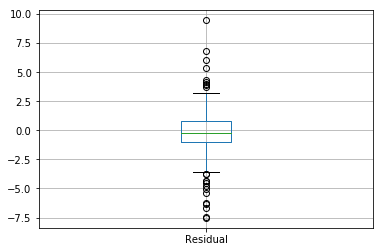

In [197]:
outDMType0=concatOutDirtyMissing[concatOutDirtyMissing['Uber Type']==0]
outDMType0.boxplot(['Residual'])
outDMType1=concatOutDirtyMissing[concatOutDirtyMissing['Uber Type']==1]
outDMType2=concatOutDirtyMissing[concatOutDirtyMissing['Uber Type']==2]